## Load the Data

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")
pd.pandas.set_option('display.max_columns',None)

#Supress warnings
import warnings
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


In [4]:
housedf = pd.read_csv('innercity.csv')
housedf.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,1800.0,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,670.0,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,3040.0,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,1740.0,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,1120.0,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: square footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room
23. total_area: Measure of both living and lot

In [6]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

## Cleaning of Data

In [4]:
# Cehcking for Duplicates

dup = housedf[housedf.duplicated()]

dup

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area


We can see from above that there are certain variables that are showing up as object data type even though the data in them is of numeric types. These variables are:
1. ceil
2. coast
3. condition
4. yr_built
5. long
6. total_area

In [5]:
col = ['room_bed','ceil','coast','condition','yr_built','long','total_area']
for i in col:
    print(i.upper())
    print(housedf[i].unique())

ROOM_BED
[ 4.  2.  3.  1.  5.  6. nan  7. 10.  8.  0.  9. 33. 11.]
CEIL
['1' '2' '3' '1.5' '2.5' '$' nan '3.5']
COAST
['0' '1' '$' nan]
CONDITION
['3' '4' '5' '2' nan '1' '$']
YR_BUILT
['1966' '1948' '2009' '1924' '1994' '2005' '1978' '1983' '2012' '1912'
 '1990' '1967' '1919' '1908' '1950' '2000' '2013' '1943' '1922' '1977'
 '2004' '1935' '1964' '1945' '1987' '2008' '1940' '2003' '1988' '1985'
 '1998' '1995' '1946' '1984' '1958' '1963' '1942' '2014' '1971' '1936'
 '1954' '1923' '2002' '1972' '2007' '1930' '1962' '1999' '1953' '1965'
 '2010' '1997' '2006' '1979' '1996' '1992' '1968' '1980' '1981' '1969'
 '2001' '1929' '1952' '1916' '1976' '1974' '1920' '1931' '1975' '1960'
 '1900' '$' '1986' '1989' '1906' '1955' '1956' '1915' '1941' '1993' '2011'
 '1925' '1947' '1991' '1926' '1927' '1951' '1961' '1932' '1917' '1928'
 '1959' '1921' '1911' '1949' '1982' '1913' '1957' '1914' '1938' '1973'
 '1937' '1944' '1970' '1901' '1907' '1939' '1918' '1934' '1904' '2015'
 '1909' '1910' '1905' '1902' '

In [6]:
housedf.replace('$',np.nan,inplace=True)

In [7]:
housedf['ceil'].unique()

array(['1', '2', '3', '1.5', '2.5', nan, '3.5'], dtype=object)

In [8]:
housedf.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated          int64
zipcode               int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

In [9]:
# Converting the relevant variables back into numeric form 
for i in col:
    housedf[i] = housedf[i].astype('float64')

In [10]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [11]:
housedf.isnull().sum().sort_values(ascending = False)

living_measure15    166
room_bed            108
room_bath           108
condition            85
ceil                 72
total_area           68
sight                57
lot_measure          42
long                 34
coast                31
furnished            29
lot_measure15        29
living_measure       17
yr_built             15
quality               1
basement              1
ceil_measure          1
yr_renovated          0
zipcode               0
lat                   0
dayhours              0
price                 0
cid                   0
dtype: int64

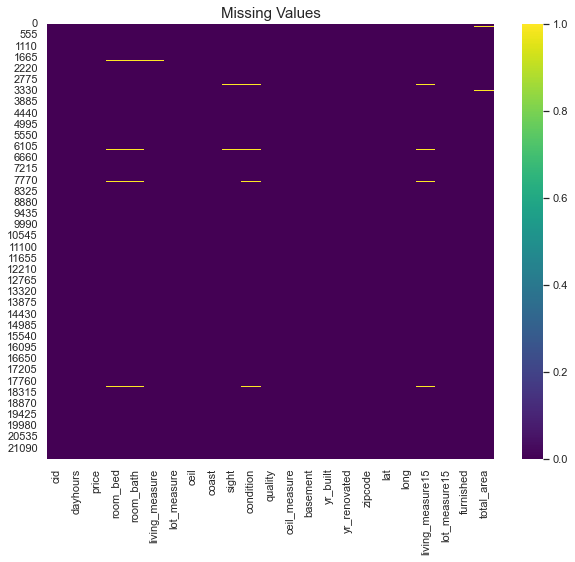

In [12]:
plt.subplots(figsize=(10,8))
sns.heatmap(housedf.isnull(), cmap='viridis')
plt.title('Missing Values', fontsize=15)
plt.show()

In [13]:
# Checking the number of rows that will get dropped if we drop the missing values

print('Number of rows to be dropped: {}'.format(housedf.shape[0]-housedf.dropna().shape[0]))
print('Percentage of rows to be dropped: {:.2f}%'.format((housedf.shape[0]-housedf.dropna().shape[0])*100/housedf.shape[0]))

Number of rows to be dropped: 325
Percentage of rows to be dropped: 1.50%


In [14]:
housedf.dropna(inplace=True)

In [15]:
housedf.shape

(21288, 23)

In [16]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21288 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21288 non-null  int64  
 1   dayhours          21288 non-null  object 
 2   price             21288 non-null  int64  
 3   room_bed          21288 non-null  float64
 4   room_bath         21288 non-null  float64
 5   living_measure    21288 non-null  float64
 6   lot_measure       21288 non-null  float64
 7   ceil              21288 non-null  float64
 8   coast             21288 non-null  float64
 9   sight             21288 non-null  float64
 10  condition         21288 non-null  float64
 11  quality           21288 non-null  float64
 12  ceil_measure      21288 non-null  float64
 13  basement          21288 non-null  float64
 14  yr_built          21288 non-null  float64
 15  yr_renovated      21288 non-null  int64  
 16  zipcode           21288 non-null  int64 

In [17]:
housedf.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21288.0,4.577499e+09,2.876915e+09,1.000102e+06,2.122049e+09,3.904921e+09,7.305300e+09,9.900000e+09
price,21288.0,5.399826e+05,3.656028e+05,7.500000e+04,3.210202e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21288.0,3.370678e+00,9.301225e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21288.0,2.114395e+00,7.686656e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21288.0,2.080089e+03,9.176964e+02,2.900000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21288.0,1.510815e+04,4.142870e+04,5.200000e+02,5.040000e+03,7.620000e+03,1.068250e+04,1.651359e+06
ceil,21288.0,1.494927e+00,5.404853e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21288.0,7.468997e-03,8.610203e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21288.0,2.342165e-01,7.658749e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21288.0,3.409245e+00,6.505383e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Feature Engineering

In [18]:
House_price = housedf.copy()

In [19]:
#Lets extract year in which house was sold and convert its type to numeric and remove dayhours as it no longer needed
#as required information is extracted from this column.

House_price['yr_sold'] = House_price['dayhours'].str.slice(stop=4).astype('int64')

In [20]:
House_price['basement'] = House_price['basement'].apply(lambda x: 0 if x==0 else 1)
House_price['renovated'] = House_price['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [21]:
# calculating the age of buliding

A = House_price[House_price['yr_renovated'] == 0].copy()
B = House_price[House_price['yr_renovated'] != 0].copy()

A['building_age'] = A['yr_sold'] - A['yr_built']
B['building_age'] = B['yr_sold'] - B['yr_renovated']
House_price = pd.concat([A, B], axis=0)

In [22]:
House_price.head(2)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold,renovated,building_age
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,1800.0,1,1966.0,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490.0,2015,0,49.0
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,670.0,0,1948.0,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771.0,2015,0,67.0


In [23]:
A = House_price[House_price['yr_sold']==2014].copy()
A.drop(['living_measure15','lot_measure15'],axis=1,inplace=True)

A.shape

(14411, 24)

In [24]:
A.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0
6,510002519,20140715T000000,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0
7,1624059224,20140618T000000,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0
8,5469503280,20140721T000000,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0


In [25]:
B = House_price[House_price['yr_sold']!=2014].copy()
B['total_area'] = B['living_measure15']+B['lot_measure15']
B['ceil_measure_perc'] = B['ceil_measure']/B['living_measure']
B['basement_perc'] = B['basement']/B['living_measure']
B['ceil_measure'] = B['ceil_measure_perc']*B['living_measure15']
B['basement'] = B['basement_perc']*B['living_measure15']
B['living_measure'] = B['living_measure15']
B['lot_measure'] = B['lot_measure15']
B.drop(['lot_measure15','living_measure15','ceil_measure_perc', 'basement_perc'],axis=1,inplace=True)
B.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
0,3876100940,20150427T000000,600000,4.0,1.75,2020.0,8660.0,1.0,0.0,0.0,3.0,8.0,1192.131148,0.662295,1966.0,0,98034,47.7228,-122.183,0.0,10680.0,2015,0,49.0
1,3145600250,20150317T000000,190000,2.0,1.00,1660.0,4100.0,1.0,0.0,0.0,4.0,6.0,1660.000000,0.000000,1948.0,0,98118,47.5546,-122.274,0.0,5760.0,2015,0,67.0
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,5100.0,1.0,0.0,0.0,3.0,7.0,1120.000000,0.000000,1924.0,0,98118,47.5663,-122.285,0.0,6220.0,2015,0,91.0
11,809001070,20150123T000000,550000,3.0,1.00,1880.0,3600.0,1.5,0.0,0.0,3.0,8.0,1880.000000,0.000000,1912.0,0,98109,47.6347,-122.352,0.0,5480.0,2015,0,103.0
13,1311800130,20150123T000000,162500,3.0,1.50,1390.0,7665.0,1.0,0.0,0.0,3.0,7.0,1390.000000,0.000000,1967.0,0,98001,47.3369,-122.275,0.0,9055.0,2015,0,48.0


In [26]:
B.shape

(6877, 24)

In [27]:
House_price = pd.concat([A,B],axis=0)

In [28]:
#As cid is a notation for a house, we don't need to feed it to our model, so along with dayhours, cid also need to be 
#removed from our dataset.

House_price.drop(['dayhours','cid'], axis=1, inplace=True)
House_price.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0


In [29]:
House_price.shape

(21288, 22)

## Exploratory Data Analysis

### Univariate Analysis

Text(0.5, 0.98, 'Price Variable Anaylsis')

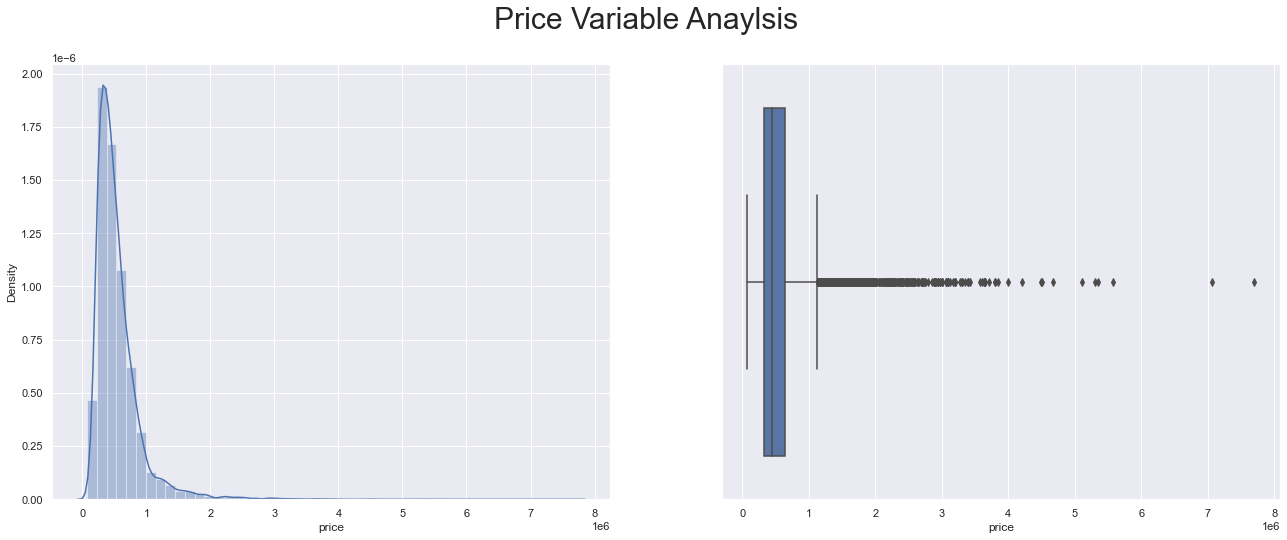

In [30]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['price'], ax=ax[0]);
sns.boxplot(House_price['price'],  orient='h', ax=ax[1]);
fig.suptitle("Price Variable Anaylsis", size=30)

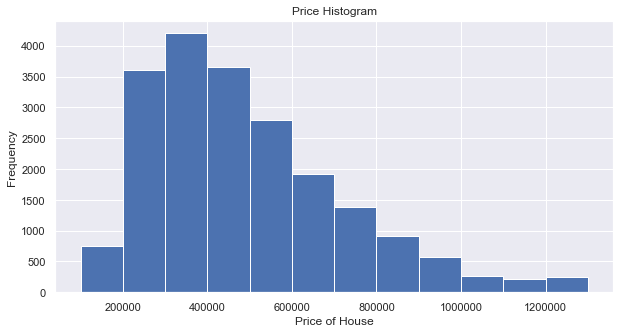

In [31]:
plt.figure(figsize = (10,5))
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]) * 1000
plt.hist(x=House_price['price'], bins=bins)
plt.xlabel('Price of House')
plt.ticklabel_format(style='plain')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

In [32]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 99.5)))

0.5% properties have a price lower than  134435.00
  1% properties have a price lower than  153935.39
  5% properties have a price lower than  210000.00
 10% properties have a price lower than  245000.00
 90% properties have a price lower than  887325.00
 95% properties have a price lower than  1160000.00
 99% properties have a price lower than  1970000.00
99.5% properties have a price lower than  2455650.00


In [33]:
House_price['room_bed'].value_counts()

3.0     9672
4.0     6783
2.0     2720
5.0     1577
6.0      266
1.0      196
7.0       38
0.0       13
8.0       12
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

Text(0.5, 1.0, 'Bedroom Analysis')

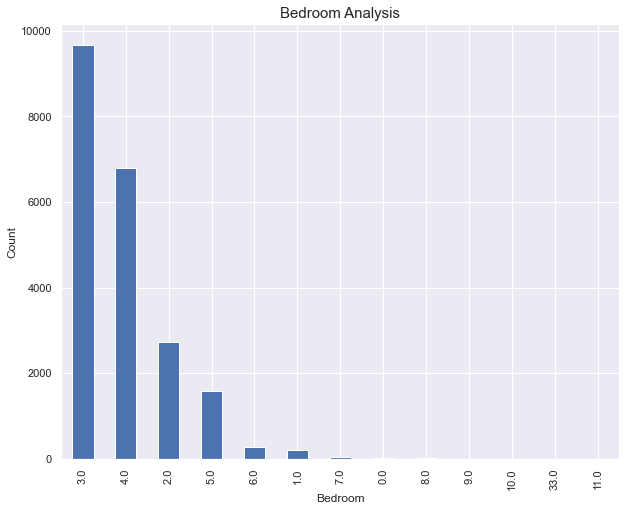

In [34]:
plt.figure(figsize=(10,8))
House_price['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedroom')
plt.ylabel('Count')
plt.title("Bedroom Analysis", size=15)

Text(0.5, 1.0, 'Bathroom Analysis')

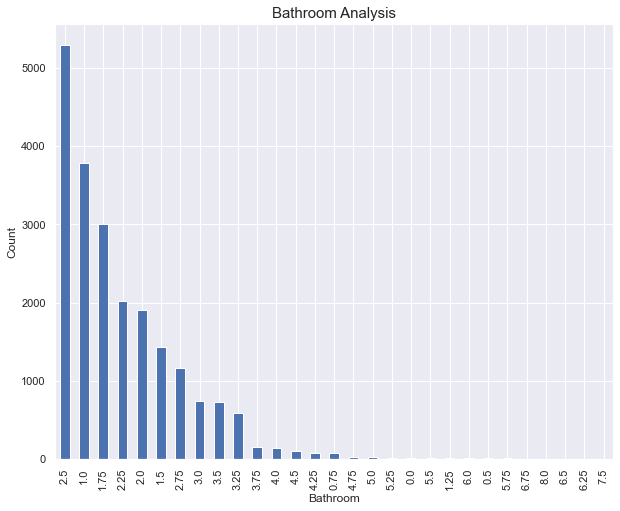

In [35]:
plt.figure(figsize=(10,8))
House_price['room_bath'].value_counts().plot(kind='bar')
plt.title('number of Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.title("Bathroom Analysis", size=15)

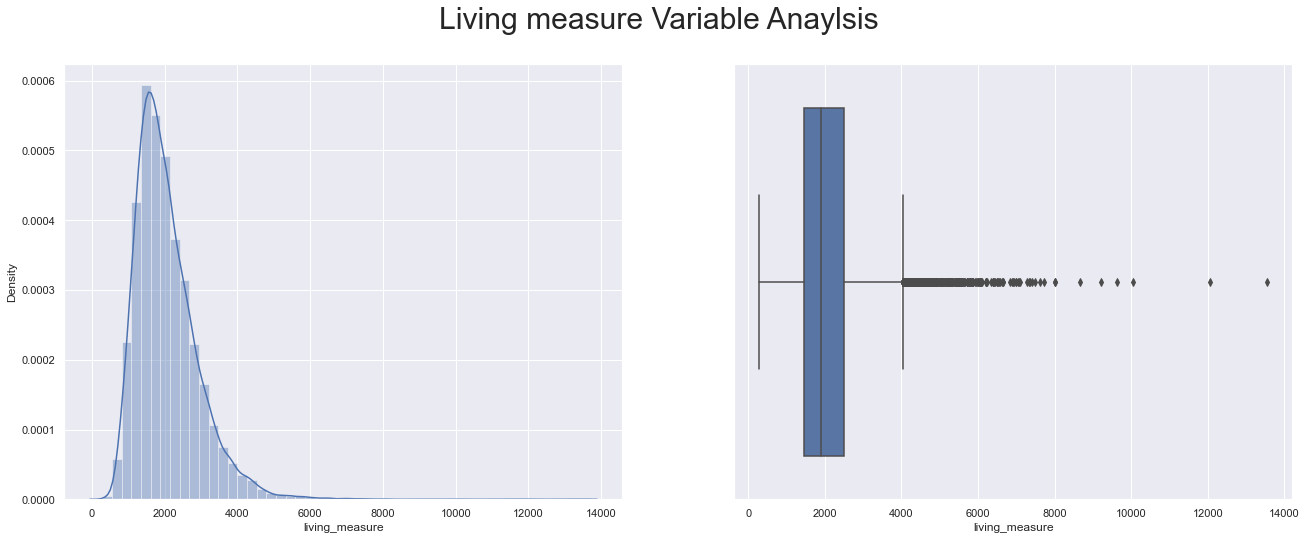

In [36]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['living_measure'], ax=ax[0])
sns.boxplot(House_price['living_measure'],  orient='h', ax=ax[1])
fig.suptitle("Living measure Variable Anaylsis", size=30);

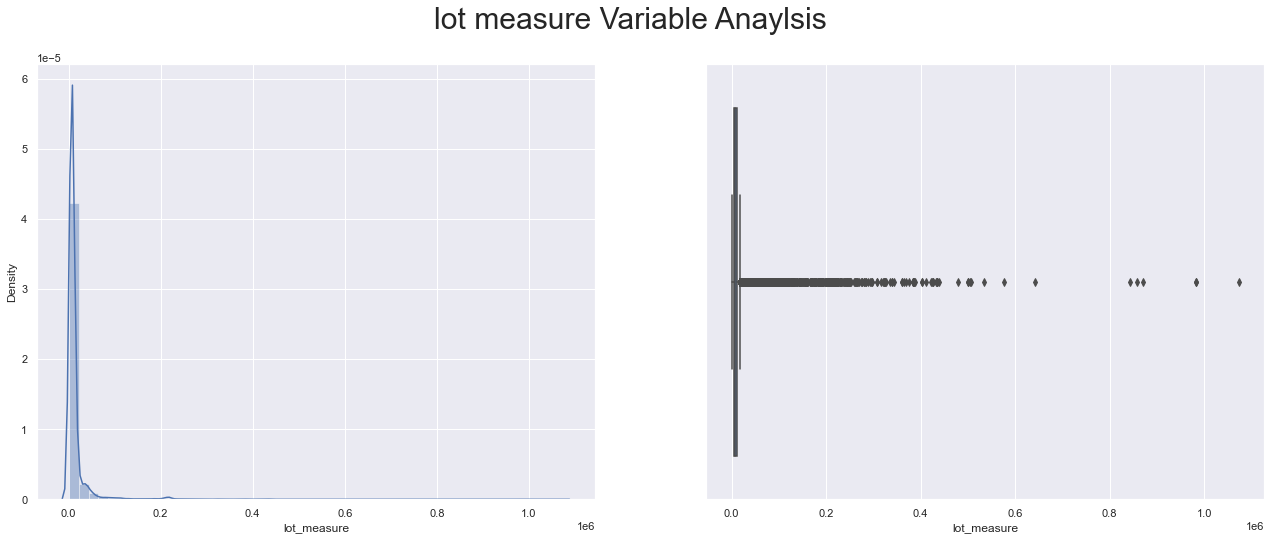

In [37]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['lot_measure'], ax=ax[0])
sns.boxplot(House_price['lot_measure'],  orient='h', ax=ax[1])
fig.suptitle("lot measure Variable Anaylsis", size=30);

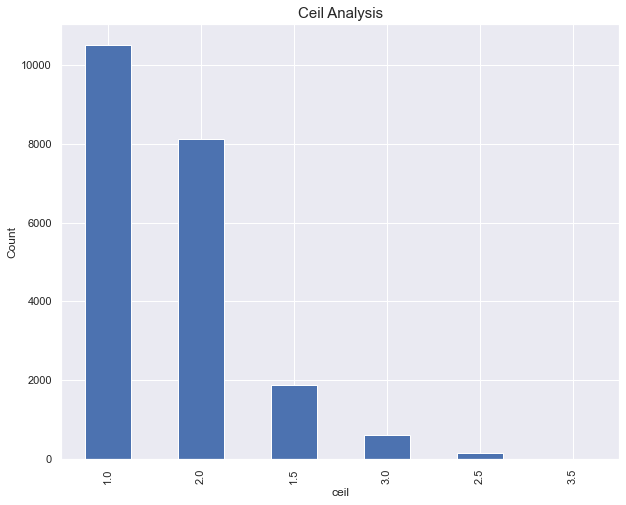

In [38]:
plt.figure(figsize=(10,8))
House_price['ceil'].value_counts().plot(kind='bar')
plt.title('ceil')
plt.xlabel('ceil')
plt.ylabel('Count')
plt.title("Ceil Analysis", size=15);

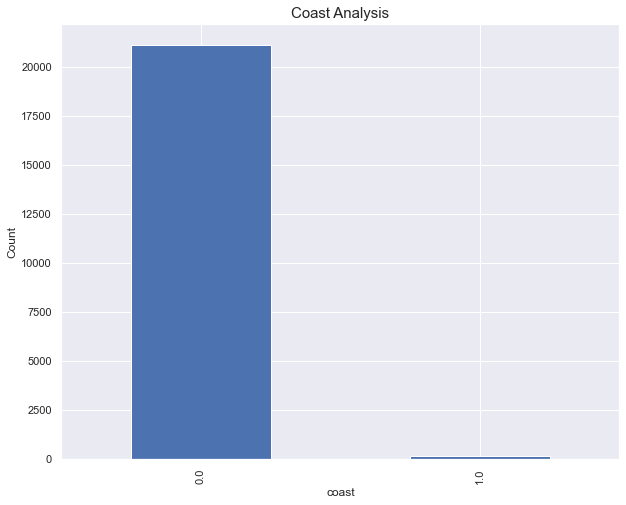

In [39]:
plt.figure(figsize=(10,8))
House_price['coast'].value_counts().plot(kind='bar')
plt.title('coast')
plt.xlabel('coast')
plt.ylabel('Count')
plt.title("Coast Analysis", size=15);

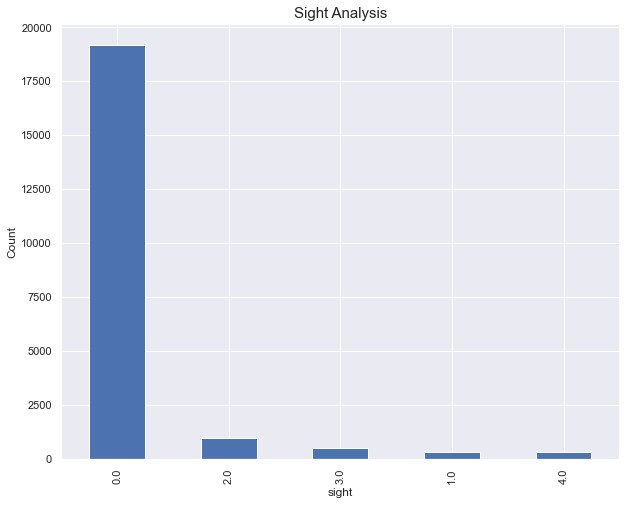

In [40]:
plt.figure(figsize=(10,8))
House_price['sight'].value_counts().plot(kind='bar')
plt.title('sight')
plt.xlabel('sight')
plt.ylabel('Count')
plt.title("Sight Analysis", size=15);

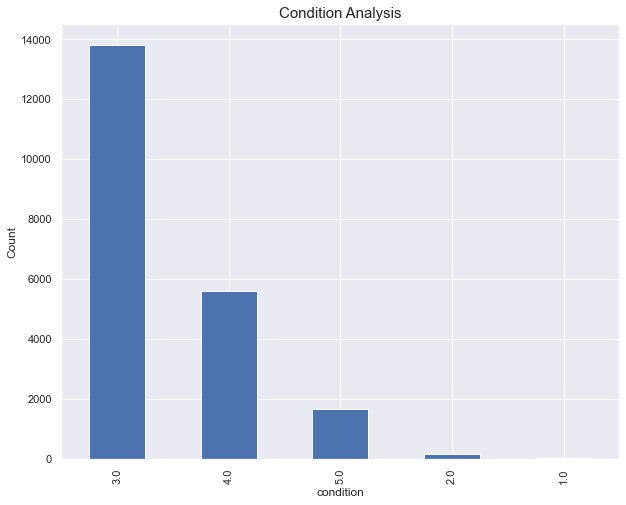

In [41]:
plt.figure(figsize=(10,8))
House_price['condition'].value_counts().plot(kind='bar')
plt.title('condition')
plt.xlabel('condition')
plt.ylabel('Count')
plt.title("Condition Analysis", size=15);

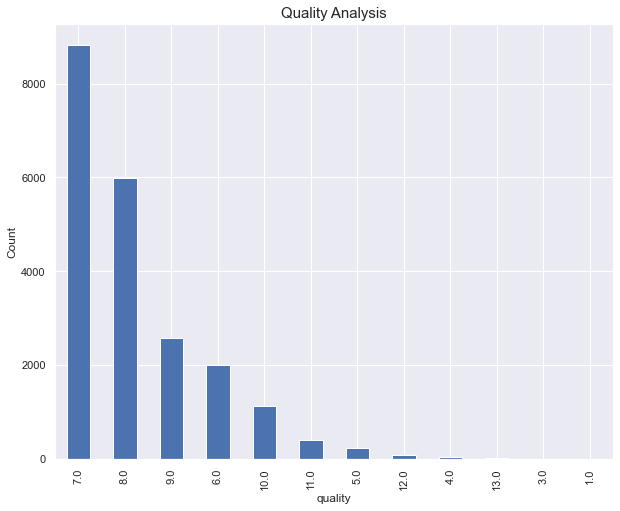

In [42]:
plt.figure(figsize=(10,8))
House_price['quality'].value_counts().plot(kind='bar')
plt.title('quality')
plt.xlabel('quality')
plt.ylabel('Count')
plt.title("Quality Analysis", size=15);

In [43]:
#checking the no. of data points with quality rating as 13
House_price[House_price['quality']>10]

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
88,1380000,5.0,4.00,3760.0,22763.0,1.0,0.0,3.0,4.0,11.0,1910.000000,1.000000,1969.0,0,98040,47.5333,-122.220,1.0,26523.0,2014,0,45.0
125,971971,4.0,3.75,3460.0,6738.0,2.0,0.0,0.0,3.0,11.0,3460.000000,0.000000,2013.0,0,98059,47.5060,-122.145,1.0,10198.0,2014,0,1.0
134,1230000,4.0,2.50,3180.0,10319.0,2.0,0.0,0.0,4.0,11.0,3180.000000,0.000000,1986.0,0,98040,47.5372,-122.232,1.0,13499.0,2014,0,28.0
178,1140000,5.0,4.00,7320.0,217800.0,2.0,0.0,0.0,3.0,11.0,7320.000000,0.000000,1992.0,0,98058,47.4473,-122.086,1.0,225120.0,2014,0,22.0
184,1600000,6.0,5.00,6050.0,230652.0,2.0,0.0,3.0,3.0,11.0,6050.000000,0.000000,2001.0,0,98024,47.6033,-121.943,1.0,236702.0,2014,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,3400000,4.0,4.00,4260.0,10408.0,2.0,0.0,0.0,3.0,11.0,3280.000000,1.000000,1939.0,2010,98112,47.6380,-122.288,1.0,14668.0,2015,1,5.0
14843,2900000,4.0,3.25,3890.0,20060.0,1.5,0.0,2.0,3.0,11.0,3658.910891,0.770297,1982.0,2008,98004,47.6312,-122.223,1.0,23950.0,2015,1,7.0
15616,1600000,4.0,4.50,2660.0,6000.0,2.0,0.0,4.0,4.0,11.0,1949.259259,0.703704,1910.0,1977,98116,47.5922,-122.388,1.0,8660.0,2015,1,38.0
18197,2650000,4.0,3.50,3210.0,15306.0,2.0,0.0,3.0,3.0,11.0,2390.425532,0.682979,1958.0,1995,98033,47.6899,-122.217,1.0,18516.0,2015,1,20.0


**There are only 494 properties which have the highest quality rating Greater than 10**

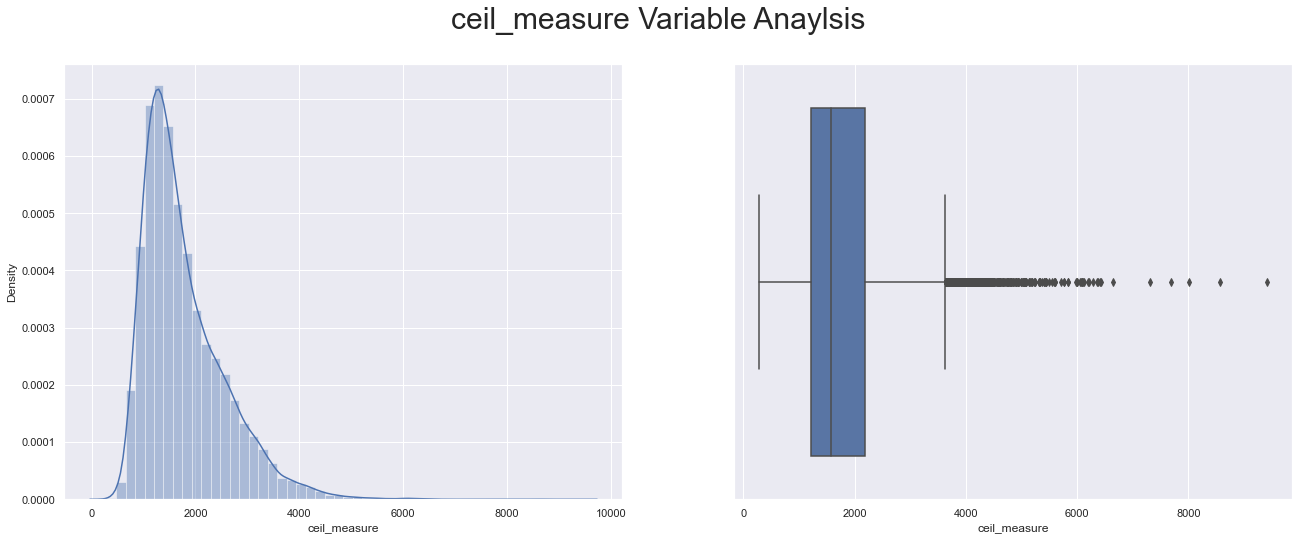

In [44]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['ceil_measure'], ax=ax[0])
sns.boxplot(House_price['ceil_measure'],  orient='h', ax=ax[1])
fig.suptitle("ceil_measure Variable Anaylsis", size=30);

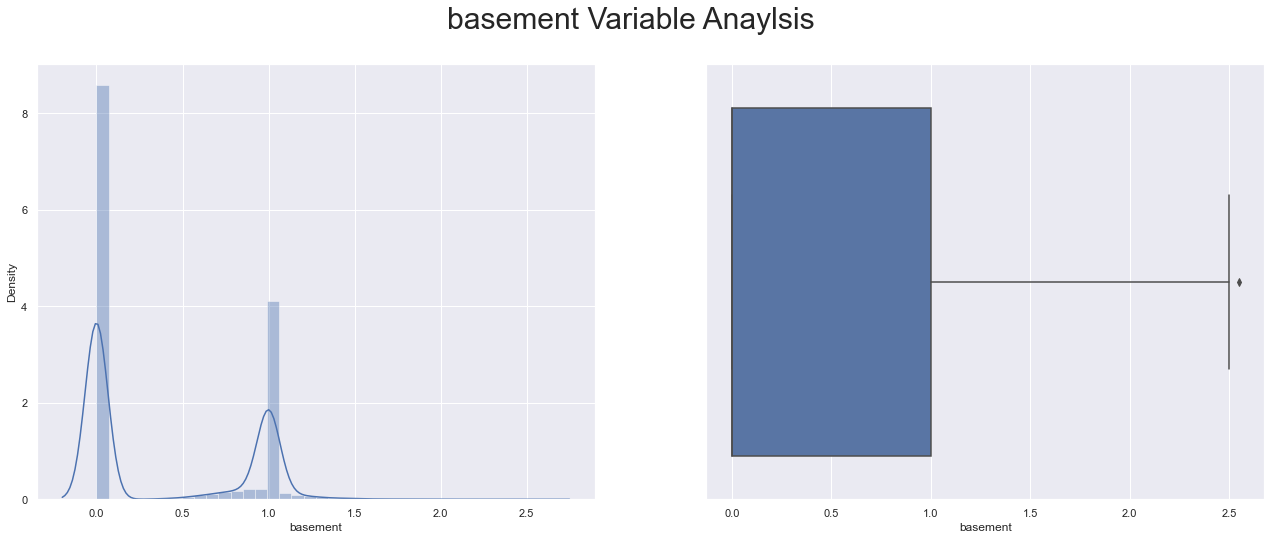

In [45]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['basement'], ax=ax[0])
sns.boxplot(House_price['basement'],  orient='h', ax=ax[1])
fig.suptitle("basement Variable Anaylsis", size=30);

In [46]:
House_price[House_price.basement==0].shape

# No basements for 12945 properties

(12945, 22)

In [47]:
House_price[House_price.basement>0].shape

(8343, 22)

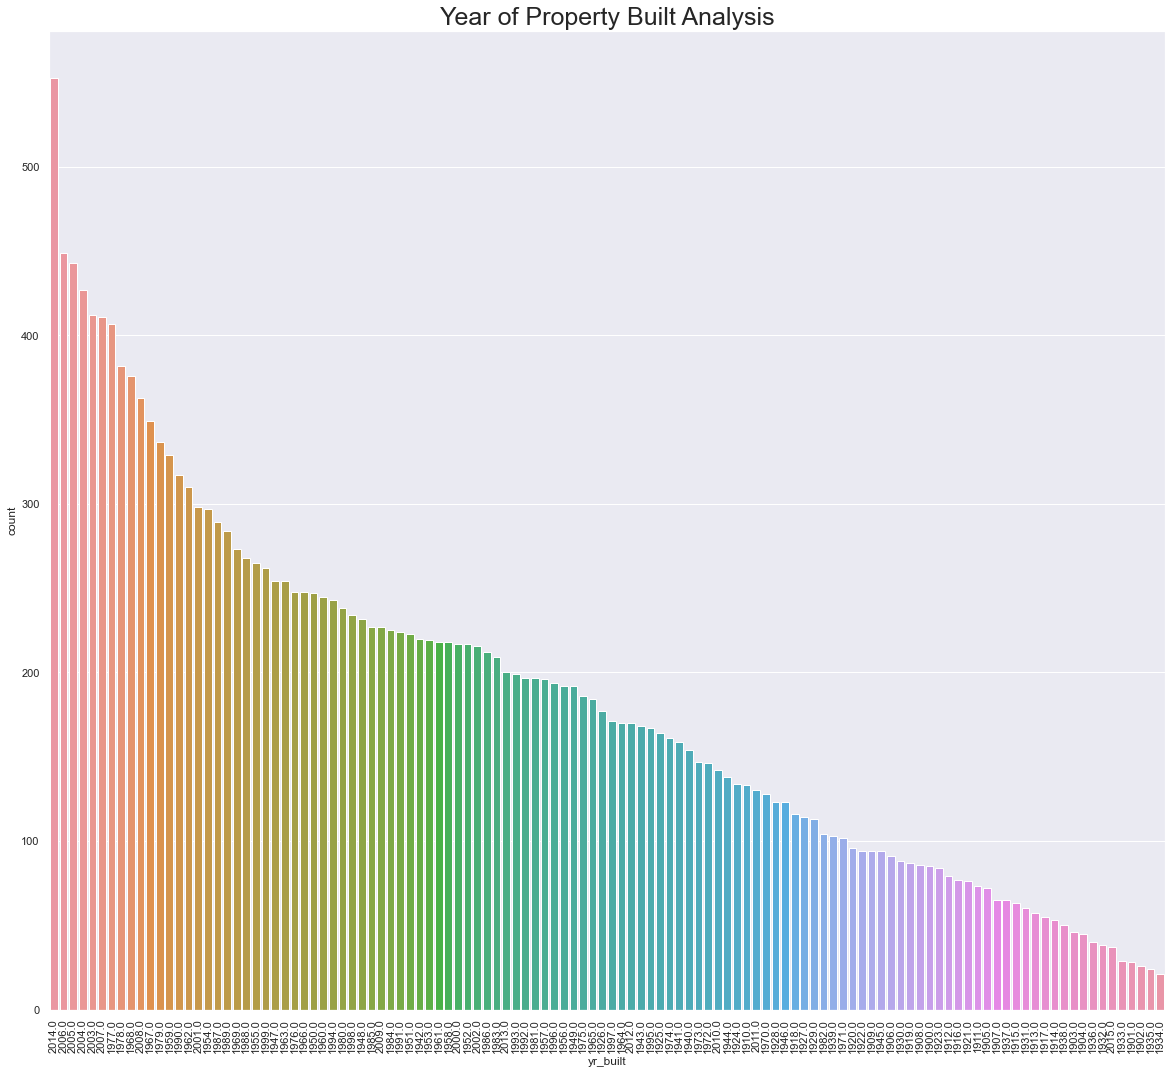

In [48]:
fig,axes = plt.subplots(figsize=(20,18))
sns.countplot(House_price['yr_built'],order = House_price['yr_built'].value_counts().index)
axes.set_xticklabels(House_price['yr_built'].value_counts().index,rotation=90)
plt.title("Year of Property Built Analysis", size=25)
plt.show()

In [49]:
House_price[House_price['yr_renovated']>0].shape

#893 houses were renoavted

(893, 22)

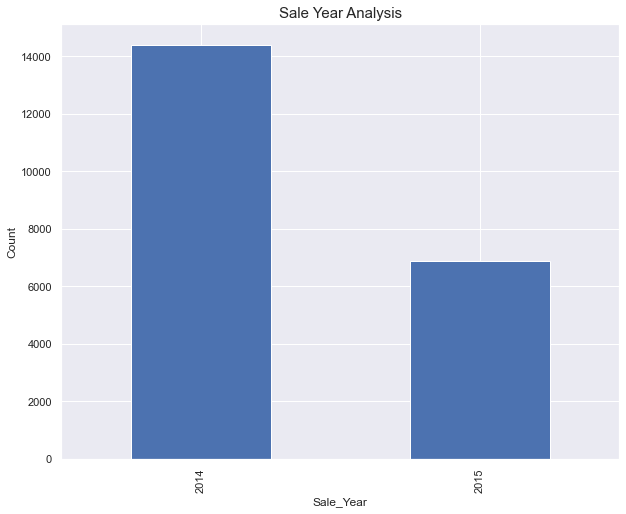

In [50]:
plt.figure(figsize=(10,8))
House_price['yr_sold'].value_counts().plot(kind='bar')
plt.title('Sale_Year')
plt.xlabel('Sale_Year')
plt.ylabel('Count')
plt.title("Sale Year Analysis", size=15);

Text(0.5, 0.98, 'Building Age Variable Anaylsis')

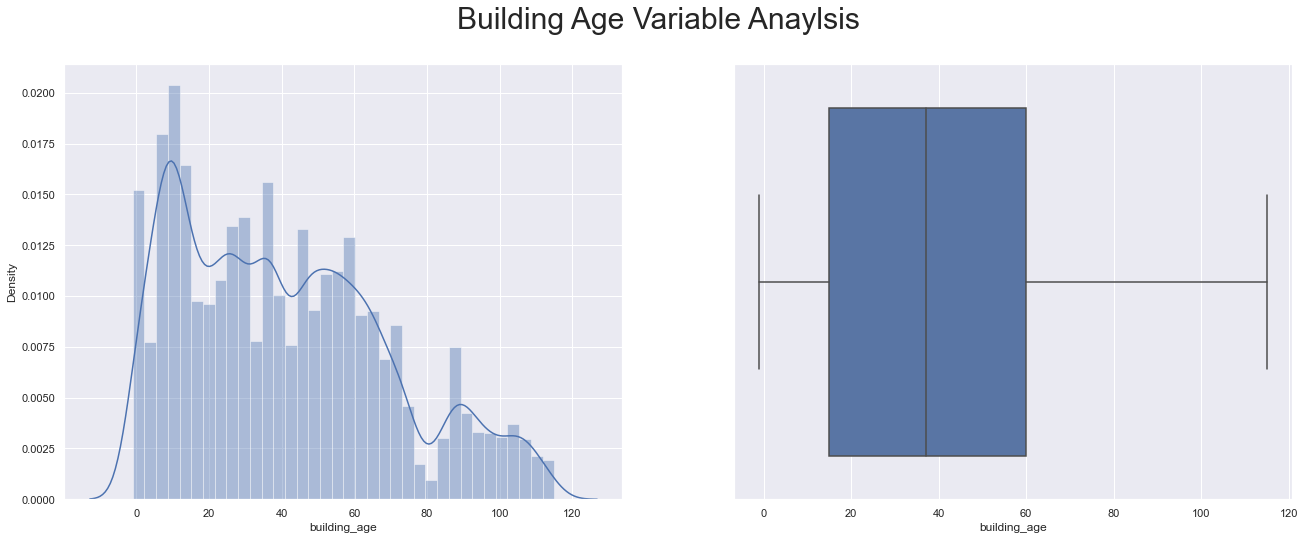

In [51]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['building_age'], ax=ax[0])
sns.boxplot(House_price['building_age'],  orient='h', ax=ax[1])
fig.suptitle("Building Age Variable Anaylsis", size=30)

### Bivariate Anaalysis

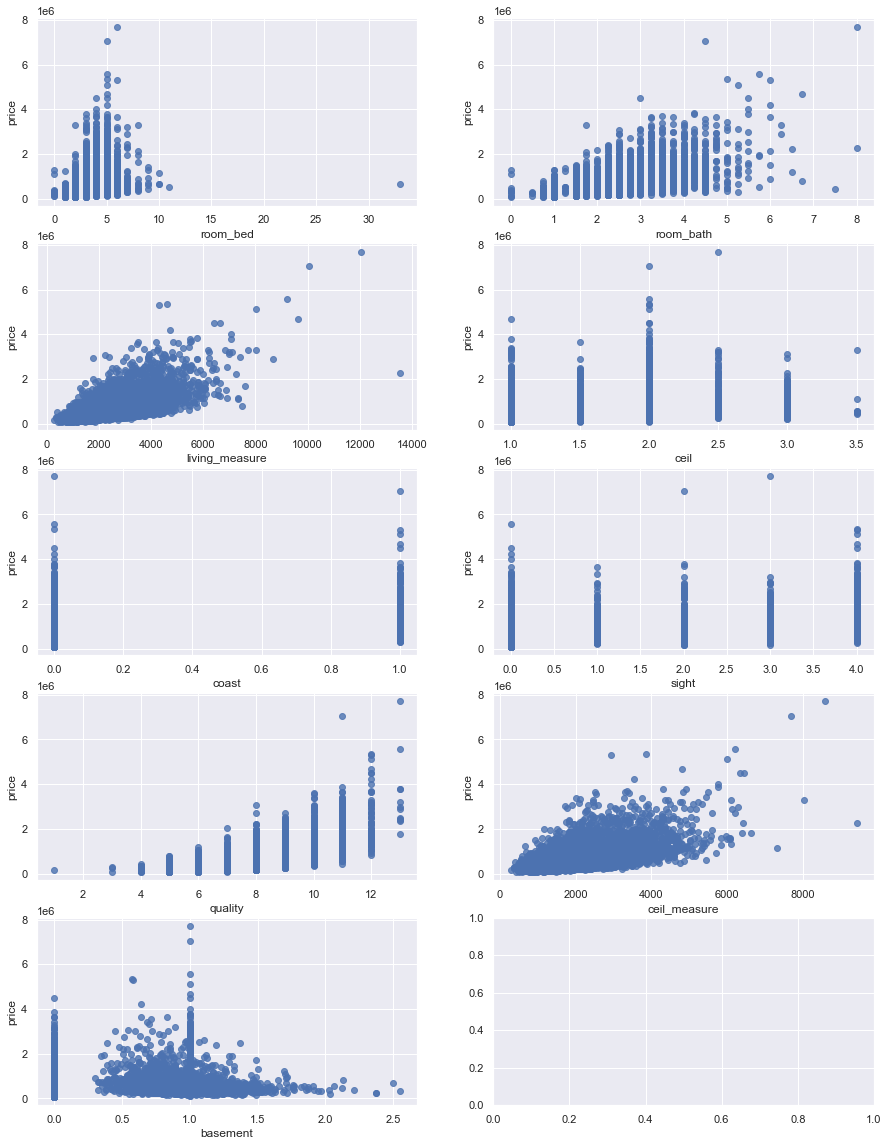

In [52]:
#Bivariate analysis to gain data insights here, using regplot

f,axes = plt.subplots(5, 2,figsize=(15,20))
sns.regplot(x='room_bed', y='price', data=House_price,  ax=axes[0][0],fit_reg=False);
sns.regplot(x='room_bath', y='price', data=House_price,  ax=axes[0][1], fit_reg=False);
sns.regplot(x='living_measure', y='price', data=House_price,  ax=axes[1][0],fit_reg=False);
sns.regplot(x='ceil', y='price', data=House_price,  ax=axes[1][1], fit_reg=False);
sns.regplot(x='coast', y='price', data=House_price,  ax=axes[2][0],fit_reg=False);
sns.regplot(x='sight', y='price', data=House_price,  ax=axes[2][1], fit_reg=False);
sns.regplot(x='quality', y='price', data=House_price,  ax=axes[3][0],fit_reg=False);
sns.regplot(x='ceil_measure', y='price', data=House_price,  ax=axes[3][1], fit_reg=False);
sns.regplot(x='basement', y='price', data=House_price,  ax=axes[4][0],fit_reg=False);

1. Price vs coast, price vs sight and price vs ceil do not seem to have any linear relationship either positive or negative.
2. Price vs living measure, Price vs ceil_measure, seems to have a positive linear relationship with outliers present.

### Multivariate Analysis

In [53]:
house_corr = House_price.corr(method ='pearson')
house_corr

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
price,1.000000,0.307878,0.523339,0.671899,0.085695,0.257425,0.267841,0.395860,0.036027,0.668567,0.560724,0.160842,0.054680,0.125734,-0.053700,0.307757,0.022102,0.568530,0.101588,0.003379,0.125381,-0.105986
room_bed,0.307878,1.000000,0.515356,0.521766,0.032804,0.174140,-0.007003,0.079122,0.027534,0.356000,0.412380,0.133717,0.153824,0.017925,-0.153418,-0.009576,0.130219,0.259016,0.045302,-0.008981,0.017631,-0.164642
room_bath,0.523339,0.515356,1.000000,0.697174,0.089321,0.500267,0.062328,0.184941,-0.126649,0.664728,0.612592,0.135411,0.507183,0.049069,-0.205762,0.024239,0.223807,0.485051,0.105810,-0.027012,0.048576,-0.538185
living_measure,0.671899,0.521766,0.697174,1.000000,0.178831,0.329740,0.102112,0.281143,-0.064148,0.738702,0.870428,0.171504,0.308424,0.046446,-0.216240,0.055627,0.257612,0.621541,0.202248,-0.072841,0.046200,-0.330526
lot_measure,0.085695,0.032804,0.089321,0.178831,1.000000,-0.005562,0.029024,0.073975,-0.005545,0.117898,0.182780,-0.036048,0.059246,0.010382,-0.138412,-0.089088,0.234863,0.124216,0.999715,-0.029583,0.010495,-0.060486
ceil,0.257425,0.174140,0.500267,0.329740,-0.005562,1.000000,0.024537,0.029143,-0.263780,0.458087,0.494968,-0.264184,0.489754,0.004000,-0.058980,0.050506,0.124355,0.347258,0.002458,-0.022509,0.003915,-0.504952
coast,0.267841,-0.007003,0.062328,0.102112,0.029024,0.024537,1.000000,0.400189,0.015876,0.082732,0.068796,0.034067,-0.025091,0.090314,0.030598,-0.014728,-0.041771,0.069495,0.031365,-0.003925,0.090708,-0.000263
sight,0.395860,0.079122,0.184941,0.281143,0.073975,0.029143,0.400189,1.000000,0.045966,0.250502,0.155447,0.177202,-0.052430,0.101397,0.085166,0.005912,-0.078661,0.220111,0.080449,0.001219,0.101531,0.018133
condition,0.036027,0.027534,-0.126649,-0.064148,-0.005545,-0.263780,0.015876,0.045966,1.000000,-0.146728,-0.164473,0.133225,-0.362824,-0.059361,0.004133,-0.015474,-0.106845,-0.123405,-0.007075,-0.044530,-0.058877,0.396183
quality,0.668567,0.356000,0.664728,0.738702,0.117898,0.458087,0.082732,0.250502,-0.146728,1.000000,0.716011,0.037311,0.448017,0.012849,-0.185382,0.114188,0.197999,0.788834,0.135262,-0.031587,0.012435,-0.461574


Text(0.5, 1.0, 'Correlation Matrix')

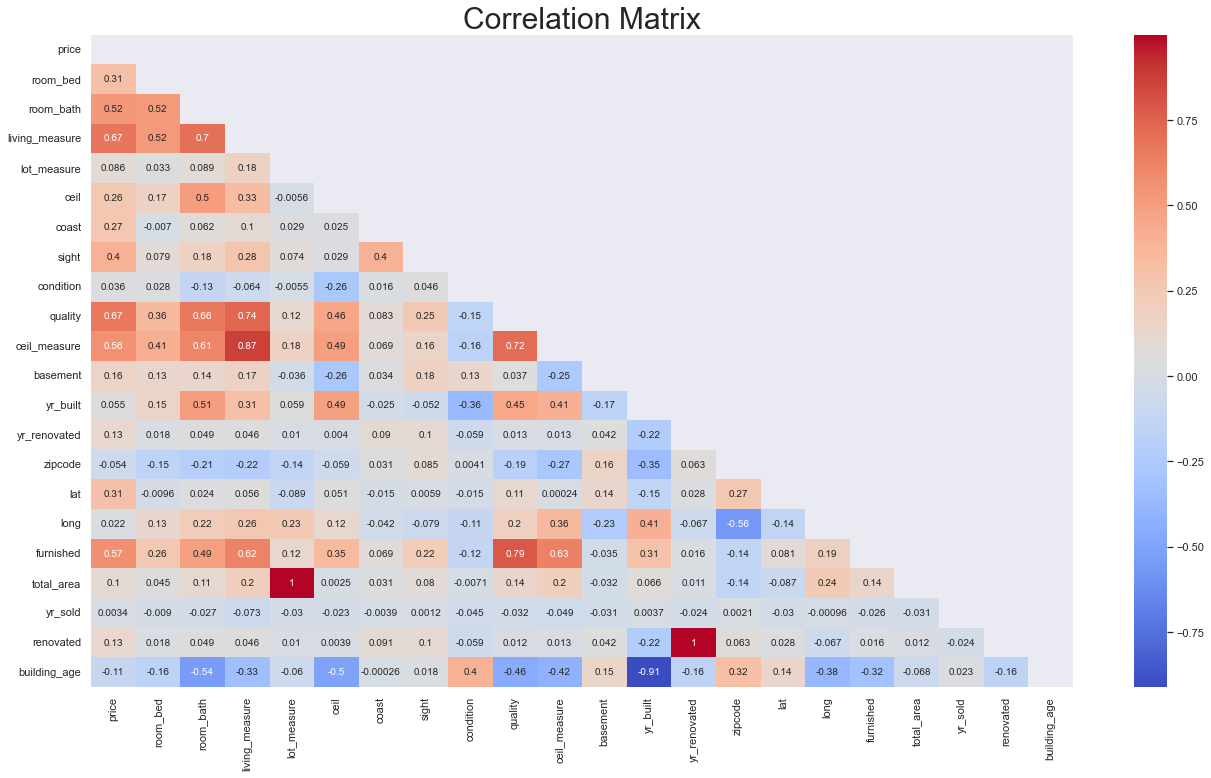

In [54]:
# Plotting heatmap
plt.subplots(figsize =(22, 12)) 
sns.heatmap(house_corr,cmap="coolwarm",annot=True, mask = np.triu(np.ones_like(house_corr, dtype=bool)))
plt.title("Correlation Matrix", size=30)

Text(0.5, 1.0, 'Correlation with Price Variable')

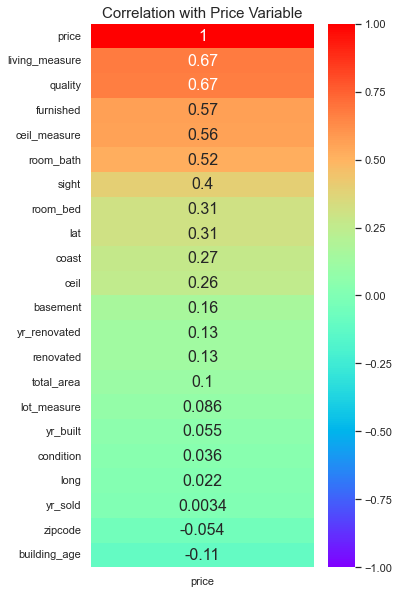

In [55]:
top_features = House_price.corr()[['price']].sort_values(by=['price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)
plt.title("Correlation with Price Variable", size=15)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(House_price.values, ix) for ix in range(House_price.shape[1])] 

i=0
for column in House_price.columns:
    if i < 25:
        print (column ,"--->",  vif[i])
        i = i+1

price ---> 10.21495460447388
room_bed ---> 22.229686537467945
room_bath ---> 27.643203082559666
living_measure ---> inf
lot_measure ---> inf
ceil ---> 17.244119405100417
coast ---> 1.2796005424621302
sight ---> 1.5771994055975516
condition ---> 35.780999632580084
quality ---> 213.0159494402637
ceil_measure ---> 91.3474128885561
basement ---> 5.310366781892026
yr_built ---> 196116.04737399454
yr_renovated ---> 20190.15634907417
zipcode ---> 4919057.720829461
lat ---> 158089.28177684688
long ---> 1349058.2852480144
furnished ---> 3.5070804343930306
total_area ---> inf
yr_sold ---> 3761407.5857934817
renovated ---> 19889.53343177909
building_age ---> 132.36109578986864


AxesSubplot(0.125,0.125;0.775x0.755)


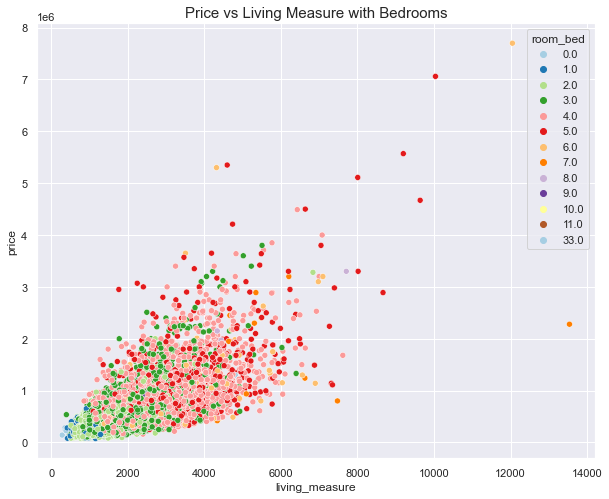

In [57]:
plt.figure(figsize=(10, 8))
print(
    sns.scatterplot(House_price['living_measure'],
                    House_price['price'],
                    hue=House_price['room_bed'],
                    palette='Paired',
                    legend='full'));
plt.title("Price vs Living Measure with Bedrooms", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


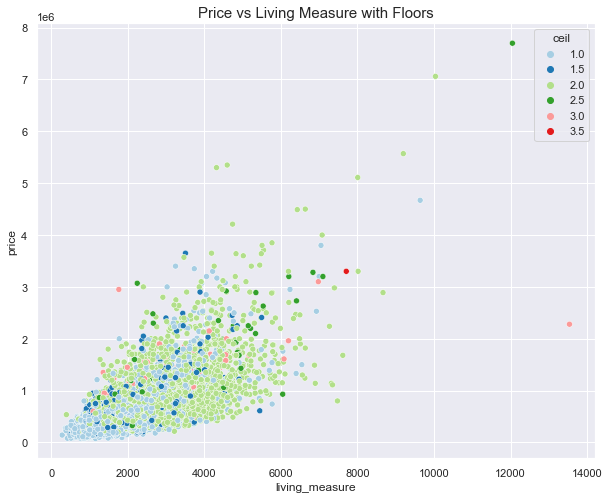

In [58]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['ceil'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure with Floors", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


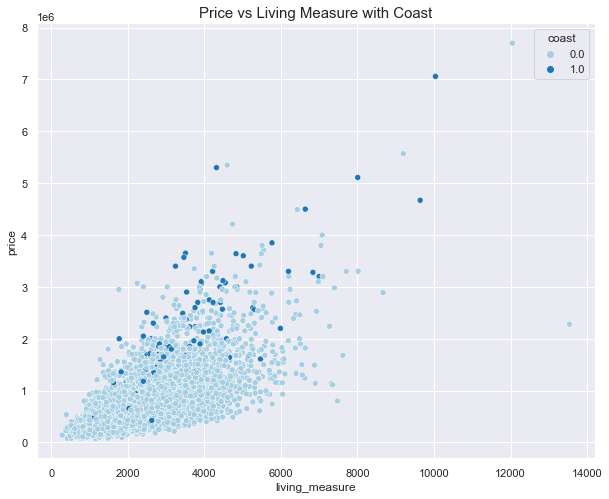

In [59]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['coast'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure with Coast", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure with Sight')

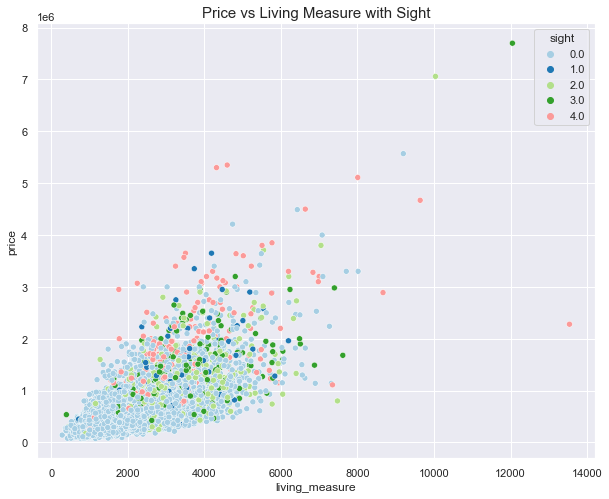

In [60]:
#Sight - Viewed in relation with price and living_measure
#Costlier houses with large living area are sighted more.
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['sight'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure with Sight", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


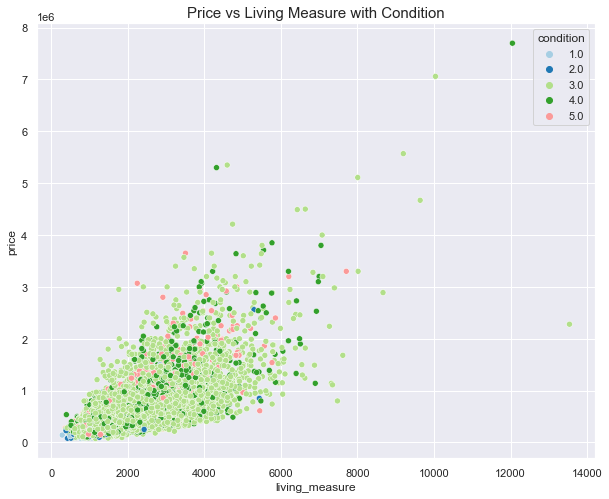

In [61]:
#Condition - Viewed in relation with price and living_measure. Most houses are rated as 3 or more.
#We can see some outliers as well
plt.figure(figsize=(10, 8))
print(
    sns.scatterplot(House_price['living_measure'],
                    House_price['price'],
                    hue=House_price['condition'],
                    palette='Paired',
                    legend='full'));
plt.title("Price vs Living Measure with Condition", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


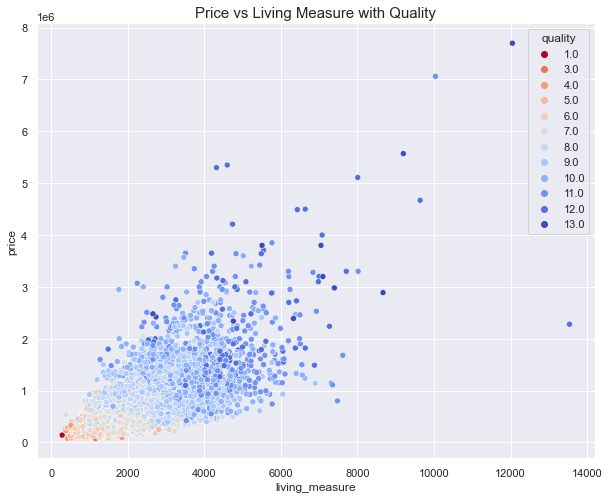

In [62]:
#quality - Viewed in relation with price and living_measure. Most houses are graded as 6 or more.
#We can see some outliers as well
plt.figure(figsize=(10, 8))
print(
    sns.scatterplot(House_price['living_measure'],
                    House_price['price'],
                    hue=House_price['quality'],
                    palette='coolwarm_r',
                    legend='full'));
plt.title("Price vs Living Measure with Quality", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


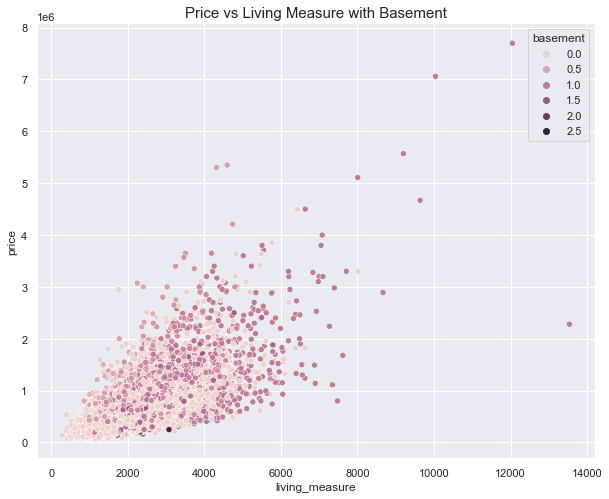

In [63]:
plt.figure(figsize=(10,8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['basement']));
plt.title("Price vs Living Measure with Basement", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


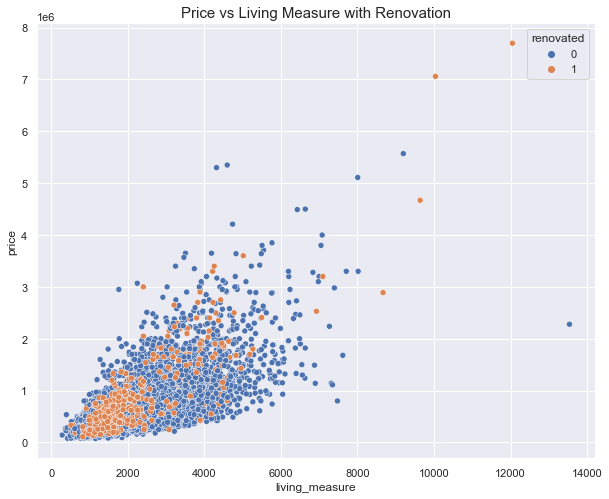

In [64]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['renovated']));
plt.title("Price vs Living Measure with Renovation", size=15);

### Outlier Treatment

In [65]:
House_price.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0


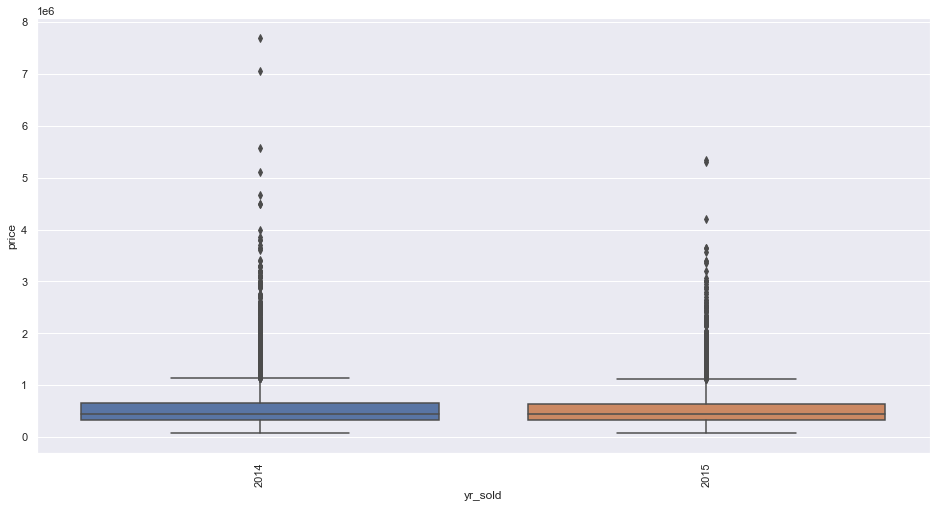

In [66]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='yr_sold', y="price", data=House_price)
plt.xticks(rotation=90);

**Year sold 2014 have more data than 2015.**

<AxesSubplot:xlabel='ceil', ylabel='price'>

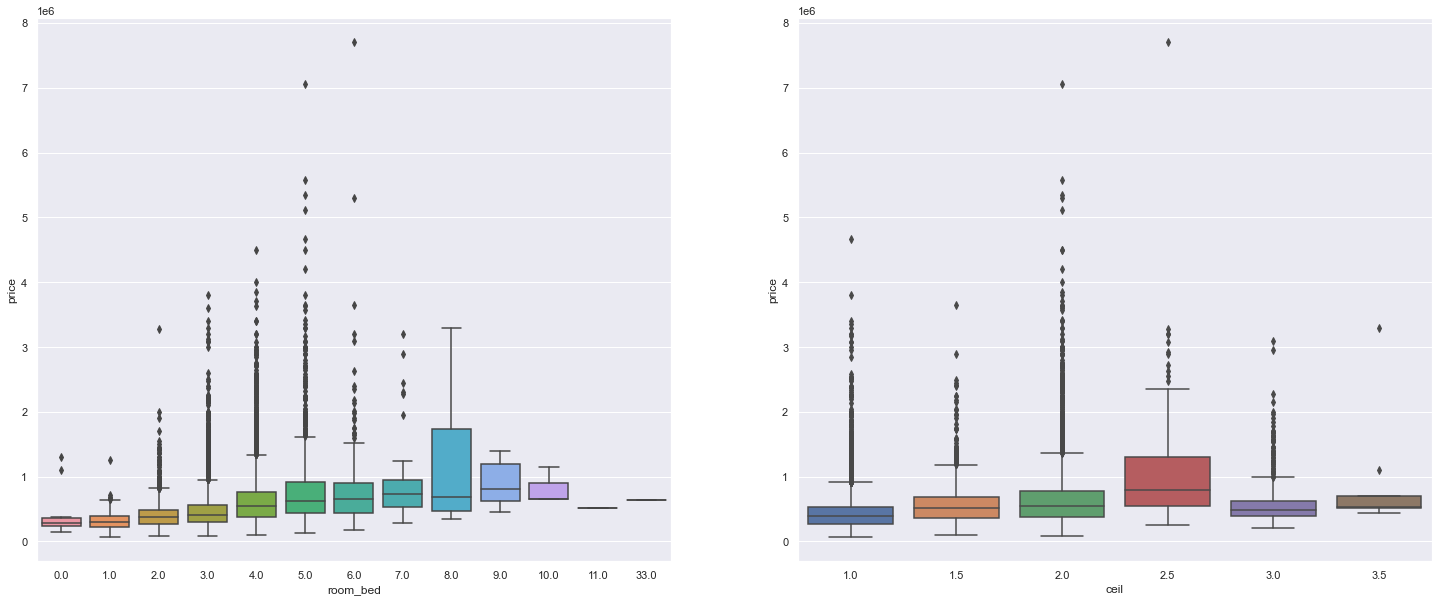

In [67]:
# Box Plot pair for number of bedrooms vs price and ceil vs price
f, axes = plt.subplots(1, 2,figsize=(25,10))
sns.boxplot(x=House_price['room_bed'],y=House_price['price'], ax=axes[0])
sns.boxplot(x=House_price['ceil'],y=House_price['price'], ax=axes[1])

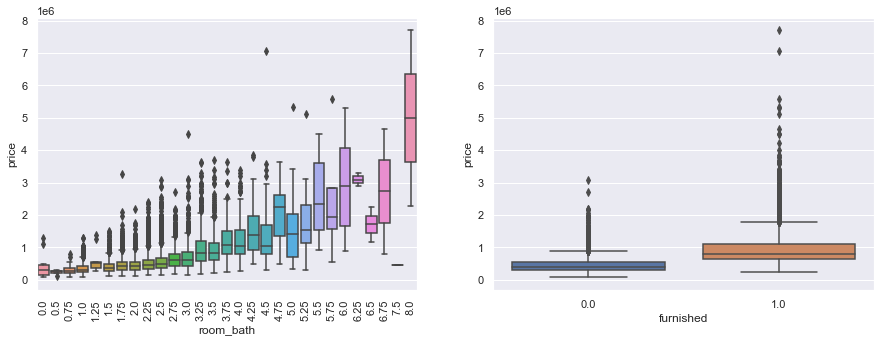

In [68]:
#Another box plot pair for number of bathrooms vs price and is house furnished or not vs price

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=House_price['room_bath'],y=House_price['price'], ax=axes[0]);
labels = axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
sns.boxplot(x=House_price['furnished'],y=House_price['price'], ax=axes[1]);

**From the above box plots we can see that many data points are in category of outliers falling above (Q3 + 1.5*IQR). Having to many outliers is not good for prediction model which eventually decreases the accuracy and increase error**

In [69]:
#Checking value counts for number of bedrooms
House_price['room_bed'].value_counts()

3.0     9672
4.0     6783
2.0     2720
5.0     1577
6.0      266
1.0      196
7.0       38
0.0       13
8.0       12
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

In [70]:
House_price[House_price['room_bed']  == 33]

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
16913,640000,33.0,1.75,1620.0,6000.0,1.0,0.0,0.0,5.0,7.0,1040.0,1.0,1947.0,0,98103,47.6878,-122.331,0.0,7620.0,2014,0,67.0


**The living_measure and lot_measure are 1620 & 6000, no.of Bath is 1.75 while the number of bed is 33. This definitely looks like a erroeneous record. Dropping this record.**

In [71]:
House_price.drop(House_price[House_price['room_bed'] == 33].index, inplace=True)

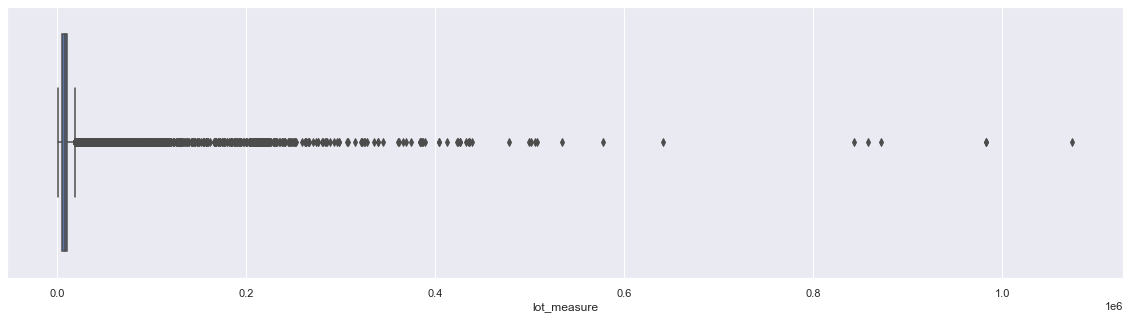

In [72]:
plt.figure(figsize=(20, 5))
sns.boxplot(House_price['lot_measure'])
plt.show()

In [73]:
rows, cols = House_price.drop(
    House_price[House_price['lot_measure'] > 435600].index).shape

original_row, _ = House_price.shape

print(
    f"Removing outliers with lot_measure >435600 or more than 10 acres, we removed :{original_row - rows} entries"
)

Removing outliers with lot_measure >435600 or more than 10 acres, we removed :15 entries


In [74]:
House_price.drop(House_price[House_price['lot_measure'] > 435600].index, inplace=True)

In [75]:
House_price.shape

(21272, 22)

In [76]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [77]:
lower_range_bed,Upper_range_bed = outlier_treatment(House_price.room_bed)
print(lower_range_bed,Upper_range_bed)

1.5 5.5


Text(0.5, 1.0, 'Bed Room Analysis')

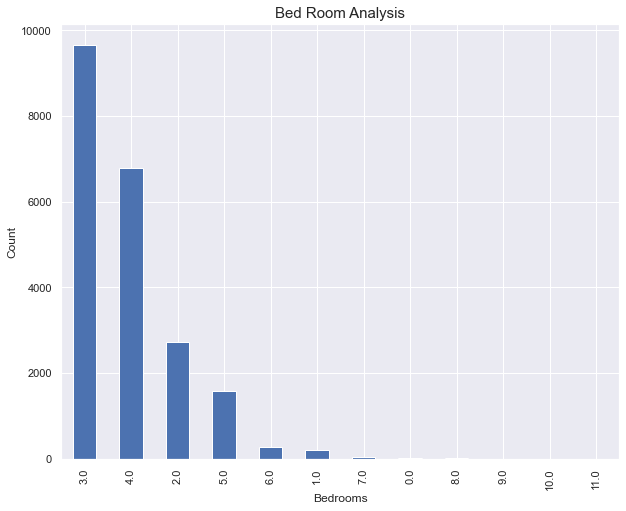

In [78]:
plt.figure(figsize=(10,8))
House_price['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title("Bed Room Analysis", size=15)

Basis Upper Bond & Lower Bond we can see that 1.5 to 5.5 is limit. Whereas as per box plot we can see that there are properties ranging from 1 bed rooms to 33 bed rooms. Lets see how many properties are there with above 6 bedrooms.

In [79]:
House_price[(House_price.room_bed > 8)].shape

(10, 22)

As There are 10 rows with more than 6 bedrooms. We will go ahead with them and drop it

Text(0.5, 1.0, 'Bath Room varaible Analysis')

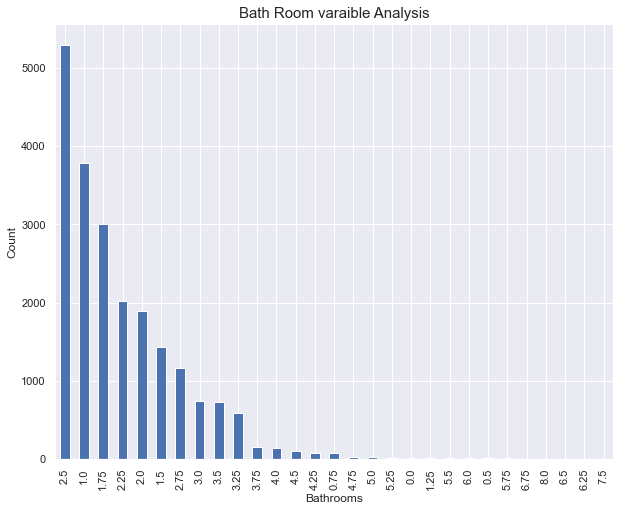

In [80]:
plt.figure(figsize=(10,8))
House_price['room_bath'].value_counts().plot(kind='bar')
plt.title('number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.title("Bath Room varaible Analysis", size=15)

In [81]:
House_price.drop(House_price[ (House_price.room_bed > 6) ].index, inplace=True)

In [82]:
lower_range_room_bath,Upper_range_room_bath = outlier_treatment(House_price.room_bath)
print(lower_range_room_bath,Upper_range_room_bath)

0.0 4.0


In [83]:
House_price[(House_price.room_bath > 5)].shape

(33, 22)

No need to drop the columns 

In [84]:
housedf.shape

(21288, 23)

In [85]:
House_price.shape

(21212, 22)

In [86]:
(21288-21218)/21288

0.003288237504697482

### Clustering

In [87]:
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.stats import zscore

In [88]:
df2 = House_price.copy()

In [89]:
data_scaled = df2.apply(zscore)
data_scaled.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,0.540484,0.731387,0.840915,1.167873,-0.381851,0.936245,11.543533,4.926446,-0.628859,0.293000,1.616149,-0.788076,-0.172657,-0.208774,0.748709,-0.296612,-0.299739,-0.494661,-0.346464,-0.691511,-0.208781,0.246148
3,-0.774992,-0.406684,0.512622,-0.366565,-0.337906,0.936245,-0.086629,-0.305147,-0.628859,0.293000,-0.041406,-0.788076,1.291306,-0.208774,-1.418344,-1.613203,0.005639,-0.494661,-0.346264,-0.691511,-0.208781,-1.245806
6,-0.199815,-1.544755,-0.800551,-1.074767,-0.427511,2.786924,-0.086629,-0.305147,-0.628859,-0.558385,-0.806432,-0.788076,1.155123,-0.208774,0.468487,0.727804,-0.846579,-0.494661,-0.455399,-0.691511,-0.208781,-1.107019
7,1.710102,0.731387,1.825794,3.103625,-0.136722,0.936245,-0.086629,-0.305147,-0.628859,1.995769,2.024163,1.266606,1.155123,-0.208774,-1.343618,0.074919,0.346527,2.021586,-0.047955,-0.691511,-0.208781,-1.107019
8,-0.243986,0.731387,0.512622,1.238693,-0.126627,0.936245,-0.086629,-0.305147,-0.628859,1.144384,1.692652,-0.788076,0.235891,-0.208774,-0.671084,-1.340507,0.453054,2.021586,-0.090767,-0.691511,-0.208781,-0.170212


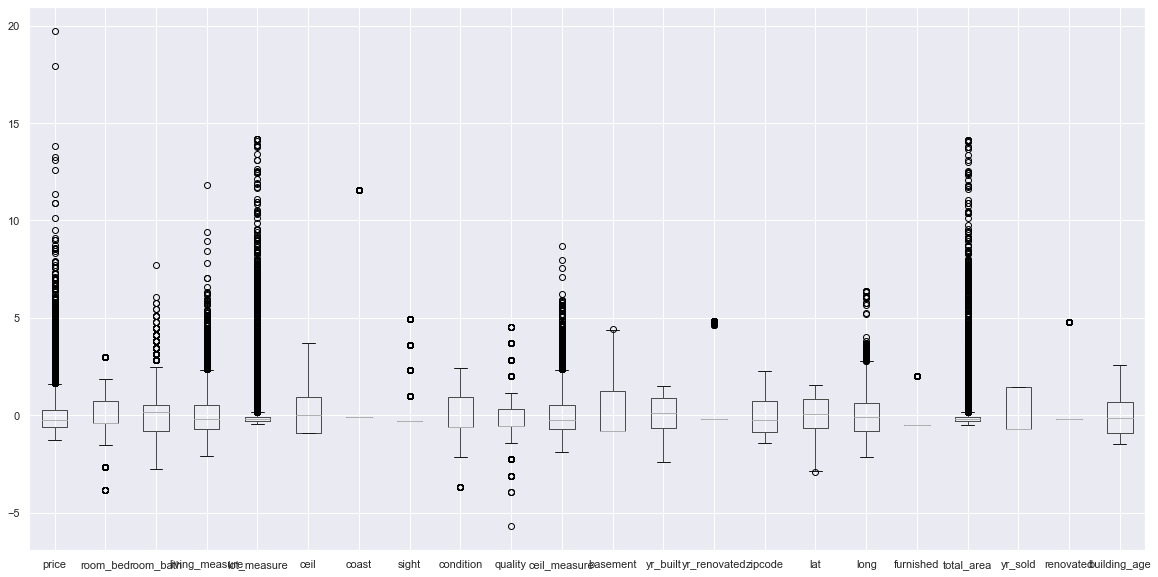

In [90]:
plt.figure(figsize=(20,10))
data_scaled.boxplot();

In [91]:
df3 = House_price.copy()

In [92]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(df3)
ne = sc.transform(df3)
ne = pd.DataFrame(ne)


In [93]:
ne.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.540484,0.731387,0.840915,1.167873,-0.381851,0.936245,11.543533,4.926446,-0.628859,0.293000,1.616149,-0.788076,-0.172657,-0.208774,0.748709,-0.296612,-0.299739,-0.494661,-0.346464,-0.691511,-0.208781,0.246148
1,-0.774992,-0.406684,0.512622,-0.366565,-0.337906,0.936245,-0.086629,-0.305147,-0.628859,0.293000,-0.041406,-0.788076,1.291306,-0.208774,-1.418344,-1.613203,0.005639,-0.494661,-0.346264,-0.691511,-0.208781,-1.245806
2,-0.199815,-1.544755,-0.800551,-1.074767,-0.427511,2.786924,-0.086629,-0.305147,-0.628859,-0.558385,-0.806432,-0.788076,1.155123,-0.208774,0.468487,0.727804,-0.846579,-0.494661,-0.455399,-0.691511,-0.208781,-1.107019
3,1.710102,0.731387,1.825794,3.103625,-0.136722,0.936245,-0.086629,-0.305147,-0.628859,1.995769,2.024163,1.266606,1.155123,-0.208774,-1.343618,0.074919,0.346527,2.021586,-0.047955,-0.691511,-0.208781,-1.107019
4,-0.243986,0.731387,0.512622,1.238693,-0.126627,0.936245,-0.086629,-0.305147,-0.628859,1.144384,1.692652,-0.788076,0.235891,-0.208774,-0.671084,-1.340507,0.453054,2.021586,-0.090767,-0.691511,-0.208781,-0.170212


In K-Means Clustering we have to choose the value of 'K' very accurately by looking at the Within Sum of Squares (WSS).

Since we have already scaled the data above, let us go ahead and perform the K-Means Clustering.

Since we do not know the value of 'K' i.e. the opitmum number of clusters we will start with 2 clusters and check the Within Sum of Squares (WSS).

The 'inertia' gives us the Within Sum of Squares (WSS) for the number of clusters defined in the KMeans function inside the 'sklearn' library.

In [94]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_scaled)
k_means.inertia_

384235.8989752457

In [95]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
k_means.inertia_

341473.7222866514

In [96]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_scaled)
k_means.inertia_

306604.11189723015

In [97]:
wss = []
for i in range(2,11):
    km_model = KMeans(n_clusters= i )
    km_model.fit(data_scaled)
    wss.append(km_model.inertia_)

In [98]:
for i in range(2,11):
    print('The wss value for',i,'clusters is',wss[i-2])

The wss value for 2 clusters is 384236.00043743534
The wss value for 3 clusters is 341473.45744289627
The wss value for 4 clusters is 306604.11189723015
The wss value for 5 clusters is 278368.2179011987
The wss value for 6 clusters is 255750.11057465497
The wss value for 7 clusters is 235582.12932759666
The wss value for 8 clusters is 224549.3520808619
The wss value for 9 clusters is 214823.030293845
The wss value for 10 clusters is 206129.66357136195


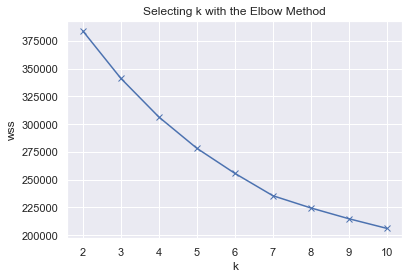

In [99]:
plt.plot(range(2,11), wss, 'bx-')
plt.xlabel('k')
plt.ylabel('wss')
plt.title('Selecting k with the Elbow Method');

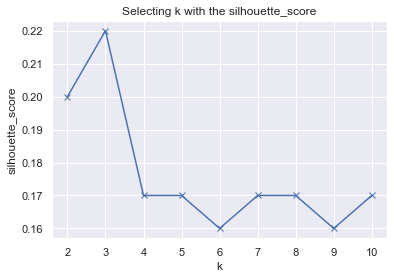

In [100]:
score = []

for i in range(2,11):
    km_model = KMeans(n_clusters= i,random_state = 42 )
    km_model.fit(data_scaled)
    score.append(round(silhouette_score(data_scaled, km_model.labels_),2))

plt.plot(range(2,11), score, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Selecting k with the silhouette_score');

In [101]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
labels = k_means.labels_

In [102]:
df2["Clus_kmeans"] = labels
df2.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age,Clus_kmeans
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0,2
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0,2
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0,1
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0,2
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0,2


In [103]:
df_clust = df2.groupby('Clus_kmeans').mean()
df_clust = df_clust.reset_index()
df_clust

,Clus_kmeans,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
0,0,757355.420993,3.418736,2.281038,2235.589165,15511.081264,1.502822,0.045147,0.604966,3.226862,7.721219,1817.103195,0.479367,1939.616253,1995.793454,98094.112867,47.578420,-122.258910,0.225734,17746.670429,2014.269752,1.0,18.476298
1,1,421405.129011,3.129998,1.702259,1650.140859,10073.201744,1.181134,0.002962,0.153612,3.579974,7.033898,1333.019476,0.480848,1957.050518,0.000000,98089.774478,47.563737,-122.255353,0.009215,11723.342603,2014.336432,0.0,57.285914
2,2,689199.792095,3.688815,2.696922,2626.030715,19061.844469,1.958639,0.010034,0.311552,3.174376,8.573789,2421.225058,0.228456,1995.334435,0.000000,98058.539770,47.552225,-122.147093,0.472100,21687.875184,2014.310083,0.0,18.975649


In [104]:
df2.Clus_kmeans.value_counts().sort_index()

0      886
1    12154
2     8172
Name: Clus_kmeans, dtype: int64

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [106]:
HClust = linkage(data_scaled, method = 'ward')

In [107]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(HClust, 3, criterion='maxclust')
clusters

array([3, 3, 3, ..., 3, 2, 2], dtype=int32)

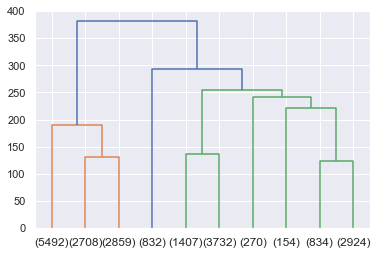

In [108]:
dend = dendrogram(HClust, truncate_mode='lastp',p = 10)

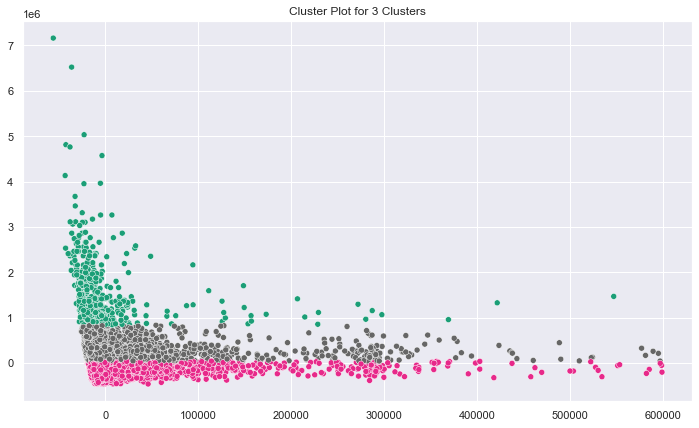

In [109]:
from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(House_price)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=plot_columns[:, 1],
                y=plot_columns[:, 0],
                hue=KMeans(n_clusters=3, random_state=0).fit(House_price).labels_,
                palette='Dark2_r',
                legend=False)
plt.title('Cluster Plot for 3 Clusters')
plt.show()

In [110]:
sil_width = silhouette_samples(data_scaled,labels)

In [111]:
df2["sil_width"] = sil_width
df2.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age,Clus_kmeans,sil_width
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0,2,0.017116
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0,2,0.081100
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0,1,0.063665
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0,2,0.284026
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0,2,0.239557


In [112]:
silhouette_samples(data_scaled,labels).min()

-0.1004022132083006

In [113]:
silhouette_samples(data_scaled,labels).max()

0.43280218007315463

## Model Building

### Linear Regression with Stats Model

In [114]:
House_price.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0


In [115]:
House_price["price"] = np.log(House_price["price"])

In [116]:
House_price.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'furnished', 'total_area', 'yr_sold', 'renovated', 'building_age'],
      dtype='object')

In [117]:
plt.rcParams['font.size']=14
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)

In [118]:
House_Price_LR = House_price[[
    'price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
    'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
    'furnished', 'total_area', 'renovated', 'building_age'
]]
House_Price_LR.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,furnished,total_area,renovated,building_age
2,13.507626,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,0.0,5455.0,0,48.0
3,12.456831,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,0.0,5461.0,0,5.0
6,13.051941,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,0.0,2198.0,0,9.0
7,13.963931,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,1.0,14380.0,0,9.0
8,13.016892,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1.0,13100.0,0,36.0


In [119]:
House_Price_LR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21212 entries, 2 to 21573
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21212 non-null  float64
 1   room_bed        21212 non-null  float64
 2   room_bath       21212 non-null  float64
 3   living_measure  21212 non-null  float64
 4   lot_measure     21212 non-null  float64
 5   ceil            21212 non-null  float64
 6   coast           21212 non-null  float64
 7   sight           21212 non-null  float64
 8   condition       21212 non-null  float64
 9   quality         21212 non-null  float64
 10  ceil_measure    21212 non-null  float64
 11  basement        21212 non-null  float64
 12  furnished       21212 non-null  float64
 13  total_area      21212 non-null  float64
 14  renovated       21212 non-null  int64  
 15  building_age    21212 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 2.8 MB


In [120]:
import statsmodels.formula.api as SM

In [121]:
House_Price_allvar = pd.get_dummies(House_Price_LR, drop_first=True)
House_Price_allvar.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,furnished,total_area,renovated,building_age
2,13.507626,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,0.0,5455.0,0,48.0
3,12.456831,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,0.0,5461.0,0,5.0
6,13.051941,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,0.0,2198.0,0,9.0
7,13.963931,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,1.0,14380.0,0,9.0
8,13.016892,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1.0,13100.0,0,36.0


In [122]:
f_1 = 'price~room_bed+room_bath+living_measure+lot_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+furnished+total_area+renovated+building_age'

In [123]:
model_1 = SM.ols(f_1,data=House_Price_allvar).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2757.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:48:24   Log-Likelihood:                -5457.8
No. Observations:               21212   AIC:                         1.095e+04
Df Residuals:                   21197   BIC:                         1.107e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.2508      0.029    355.177      0.000      10.194      10.307
room_bed          -0.0120      0.003     -3.889      0.000      -0.018      -0.006
room_bath          0.0956      0.005     19.050      0.000       0.086       0.105
living_measure  8.475e-05   6.68e-06     12.688      0.000    7.17e-05    9.78e-05
lot_measure    -4.241e-05   3.34e-06    -12.691      0.000    -4.9e-05   -3.59e-05
ceil               0.1114      0.005     20.334      0.000       0.101       0.122
coast              0.3265      0.027     11.916      0.000       0.273       0.380
sight              0.0483      0.003     14.596      0.000       0.042       0.055
condition          0.0423      0.004     11.497      0.000       0.035       0.049
quality            0.2291      0.004     59.761      0.000       0.222       0.237
ceil_measure     1.01e-05   1.06e-05      0.954      0.340   -1.06e-05    3.08e-05
basement           0.0949      0.008     11.938      0.000       0.079       0.111
furnished          0.0203      0.009      2.245      0.025       0.003       0.038
total_area      4.234e-05   3.34e-06     12.684      0.000    3.58e-05    4.89e-05
renovated          0.3294      0.011     29.679      0.000       0.308       0.351
building_age       0.0055      0.000     51.742      0.000       0.005       0.006
==============================================================================
Omnibus:                       62.150   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.953
Skew:                          -0.062   Prob(JB):                     5.30e-17
Kurtosis:                       3.263   Cond. No.                     6.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula="y~x", data=x_vars).fit().rsquared
        vif = round(1 / (1 - rsq), 2)
        print(xvar_names[i], " VIF = ", vif)

In [125]:
vif_cal(input_data= House_Price_allvar.drop('price', axis=1))

room_bed  VIF =  1.59
room_bath  VIF =  3.16
living_measure  VIF =  inf
lot_measure  VIF =  inf
ceil  VIF =  1.9
coast  VIF =  1.2
sight  VIF =  1.38
condition  VIF =  1.24
quality  VIF =  4.39
ceil_measure  VIF =  14.92
basement  VIF =  3.24
furnished  VIF =  2.79
total_area  VIF =  inf
renovated  VIF =  1.07
building_age  VIF =  2.01


The above values corroborates our understanding of vif. Since there was a presence of multicollinearity we see that the vif values are very high in living_measure, lot_measure, ceil_measure, basement & total_area .

If variables are decided to be dropped on the basis of vif, we will drop them one by one. After one variable is dropped we are going to run the regression model and the vif function. Then if needed we will drop more variables.

Dropping variables means losing out on information. That can hamper the predictive as well as the descriptive power of the model.

**Dropping Lot_measure**

In [126]:
House_Price_Dropfeatures = House_Price_allvar[[
'price', 'room_bed', 'room_bath','ceil', 'coast', 'sight', 'condition', 'quality', 'basement',
    'furnished','renovated', 'building_age'
]]
House_Price_Dropfeatures.head()

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,basement,furnished,renovated,building_age
2,13.507626,4.0,2.75,2.0,1.0,4.0,3.0,8.0,0.0,0.0,0,48.0
3,12.456831,3.0,2.50,2.0,0.0,0.0,3.0,8.0,0.0,0.0,0,5.0
6,13.051941,2.0,1.50,3.0,0.0,0.0,3.0,7.0,0.0,0.0,0,9.0
7,13.963931,4.0,3.50,2.0,0.0,0.0,3.0,10.0,1.0,1.0,0,9.0
8,13.016892,4.0,2.50,2.0,0.0,0.0,3.0,9.0,0.0,1.0,0,36.0


In [127]:
f_2 = 'price~room_bed+room_bath+ceil+coast+sight+condition+quality+basement+furnished+renovated+building_age'

In [128]:
model_2 = SM.ols(f_2,data=House_Price_Dropfeatures).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     3290.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:48:26   Log-Likelihood:                -5895.8
No. Observations:               21212   AIC:                         1.182e+04
Df Residuals:                   21200   BIC:                         1.191e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.0498      0.029    352.297      0.000       9.994      10.106
room_bed         0.0146      0.003      4.895      0.000       0.009       0.021
room_bath        0.1388      0.005     28.413      0.000       0.129       0.148
ceil             0.1060      0.005     19.728      0.000       0.095       0.117
coast            0.3481      0.028     12.450      0.000       0.293       0.403
sight            0.0573      0.003     17.221      0.000       0.051       0.064
condition        0.0415      0.004     11.094      0.000       0.034       0.049
quality          0.2663      0.004     72.146      0.000       0.259       0.274
basement         0.1047      0.005     20.583      0.000       0.095       0.115
furnished        0.0624      0.009      6.851      0.000       0.045       0.080
renovated        0.3410      0.011     30.153      0.000       0.319       0.363
building_age     0.0057      0.000     53.029      0.000       0.005       0.006
==============================================================================
Omnibus:                       71.518   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.798
Skew:                          -0.020   Prob(JB):                     2.60e-21
Kurtosis:                       3.325   Cond. No.                         676.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
model_MLR_1_pred = model_1.fittedvalues
model_MLR_2_pred = model_2.fittedvalues

In [130]:
from sklearn import metrics

metrics.mean_squared_error(House_Price_allvar['price'], model_MLR_1_pred,squared=False)

0.31297291162827817

In [131]:
metrics.mean_squared_error(House_Price_Dropfeatures['price'], model_MLR_2_pred,squared=False)

0.3195022090911712

### Regression Analysis

In [132]:
df = House_Price_Dropfeatures.copy()

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sn

In [134]:
X = df.drop('price',axis=1)
Y = df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [135]:
X_train_LM = sn.add_constant(X_train)
X_test_LM = sn.add_constant(X_test)
vars_used = ['const','room_bed', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'basement', 'renovated',
       'building_age', 'room_bath']
model = sn.OLS(np.log(Y_train),X_train_LM[vars_used]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     2447.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:48:29   Log-Likelihood:                 33817.
No. Observations:               14848   AIC:                        -6.761e+04
Df Residuals:                   14837   BIC:                        -6.753e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3301      0.002   1111.278   

In [136]:
r2_score(np.log(Y_test),model.predict(X_test_LM[vars_used]))

0.6189346943393483

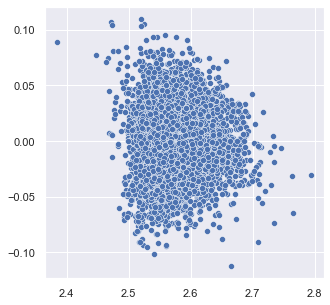

In [137]:
sns.scatterplot(x = model.fittedvalues,y =model.resid);

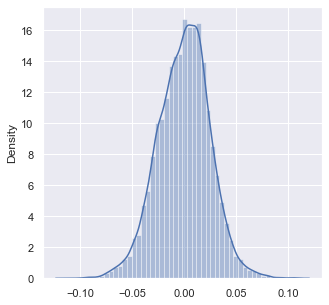

In [138]:
sns.distplot(model.resid,kde=True);

## Machine Learning Models

In [142]:
House_price.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'furnished', 'total_area', 'yr_sold', 'renovated', 'building_age'],
      dtype='object')

In [143]:
House_price.drop(['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','yr_sold'],axis=1,inplace=True)


In [144]:
House_price.shape

(21212, 16)

In [145]:
# Copy all the predictor variables into X dataframe
X = House_price.drop('price', axis=1)

# Copy target into the y dataframe. 
y = House_price[['price']]

In [146]:
#Splitting the dataset into the traing set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [147]:
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_percentage_error

#import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

#### Random Forest Regression

In [148]:
%%time
tuned_params = {
        'n_estimators': [400, 500, 600, 700, 800,1000],
    'max_features': [4,5,6,7],
    'min_samples_split': [2, 5, 10, 12, 13],
    'min_samples_leaf': [3, 4, 5],
    'max_depth': [3, 7, 9, 11, 13],
}

rf_model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

rf_model.fit(X_train, y_train)

CPU times: total: 19.4 s
Wall time: 2min 51s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 7, 9, 11, 13],
                                        'max_features': [4, 5, 6, 7],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [2, 5, 10, 12, 13],
                                        'n_estimators': [400, 500, 600, 700,
                                                         800, 1000]},
                   scoring='neg_mean_absolute_error')

In [149]:
rf_model.best_estimator_

RandomForestRegressor(max_depth=13, max_features=6, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [150]:
## Predict Train results
y_train_pred = rf_model.predict(X_train)

In [151]:
## Predict Test results
y_pred = rf_model.predict(X_test)

In [152]:
from math import sqrt
from sklearn.metrics import r2_score

In [153]:
#entering metrics score to the metics dataframe
RF_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False)
RF_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
RF_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  0.2431325850488396
R-squared:  0.789650988934745
Mean Absolute Percentage Error:  0.014698747360922543


In [154]:
results_train = pd.DataFrame([['Random Forest Train', RF_RMSE_Train, RF_R2_Train, RF_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])
results_train

,Model,RMSE,Adjusted_r_2,MAPE
0,Random Forest Train,0.243133,0.789651,0.014699


In [155]:
#entering metrics score to the metics dataframe
RF_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
RF_R2_Test = metrics.r2_score(y_test, y_pred) 
RF_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  0.2880082112570714
R-squared:  0.6873415352248308
Mean Absolute Percentage Error:  0.017488149191089528


In [168]:
results_test = pd.DataFrame([['Random Forest Test', RF_RMSE_Test, RF_R2_Test, RF_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])
results_test

,Model,RMSE,Adjusted_r_2,MAPE
0,Random Forest Test,0.288008,0.687342,0.017488


##### Feature Importance

In [156]:
## Building the model again with the best hyperparameters
rf_model = RandomForestRegressor(min_samples_split=10, n_estimators=800)
rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=800)

In [172]:
importance = rf_model.feature_importances_
importance

array([0.01284318, 0.0293858 , 0.10591731, 0.05077911, 0.00682043,
       0.00568613, 0.01455196, 0.01312881, 0.35972633, 0.03852932,
       0.01182524, 0.17525215, 0.04199233, 0.01649728, 0.11706463])

In [173]:
pd.Series(rf_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

quality           0.359726
furnished         0.175252
building_age      0.117065
living_measure    0.105917
lot_measure       0.050779
total_area        0.041992
ceil_measure      0.038529
room_bath         0.029386
renovated         0.016497
sight             0.014552
condition         0.013129
room_bed          0.012843
basement          0.011825
ceil              0.006820
coast             0.005686
dtype: float64

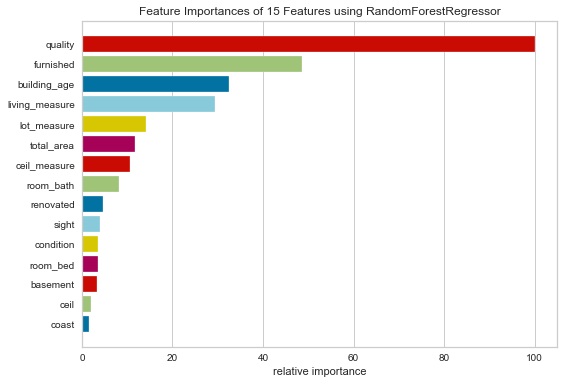

<AxesSubplot:title={'center':'Feature Importances of 15 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [159]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(rf_model)
viz.fit(X, y)
viz.show()

#### Descision Tree Regression

In [160]:
%%time
tuned_params = {
    'min_samples_split': [2, 3, 4, 5, 7, 9 , 11], 
    'min_samples_leaf': [4, 6, 9, 10], 
    'max_depth': [3, 7, 9, 11, 13]
}

dt_model = GridSearchCV(DecisionTreeRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

dt_model.fit(X_train, y_train)

CPU times: total: 2.89 s
Wall time: 23.5 s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'min_samples_leaf': [4, 6, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 7, 9, 11]},
             scoring='neg_mean_absolute_error')

In [161]:
dt_model.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=9, min_samples_split=9)

In [162]:
## Predict Train results
y_train_pred = dt_model.predict(X_train)

In [163]:
## Predict Test results
y_pred = dt_model.predict(X_test)

In [164]:
#entering metrics score to the metics dataframe
DT_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
DT_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
DT_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  0.2901877923063028
R-squared:  0.7003512873399824
Mean Absolute Percentage Error:  0.017639136710269464


In [165]:
model_results = pd.DataFrame([['Decision Tree Train', DT_RMSE_Train, DT_R2_Train, DT_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.243133      0.789651  0.014699
1  Decision Tree Train  0.290188      0.700351  0.017639


In [166]:
#entering metrics score to the metics dataframe
DT_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
DT_R2_Test = metrics.r2_score(y_test, y_pred) 
DT_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  0.31245882200175973
R-squared:  0.6320015126665515
Mean Absolute Percentage Error:  0.018898077030200203


In [170]:
model_results = pd.DataFrame([['Decision Tree Test', DT_RMSE_Test, DT_R2_Test, DT_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,RMSE,Adjusted_r_2,MAPE
0,Random Forest Test,0.288008,0.687342,0.017488
1,Decision Tree Test,0.312459,0.632002,0.018898
2,Decision Tree Test,0.312459,0.632002,0.018898


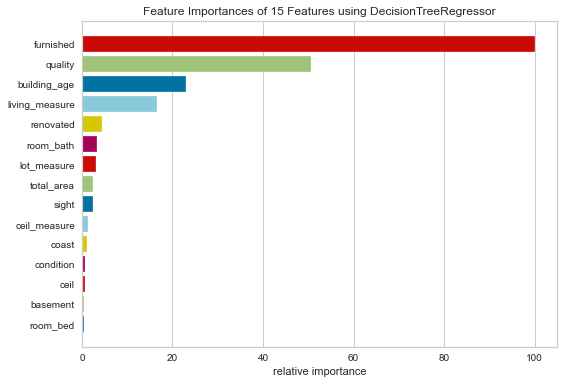

<AxesSubplot:title={'center':'Feature Importances of 15 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [171]:
dt_model = DecisionTreeRegressor(max_depth=9, min_samples_leaf=9, min_samples_split=4,random_state =1)
viz = FeatureImportances(dt_model)
viz.fit(X, y)
viz.show()

In [174]:
importance = dt_model.feature_importances_
importance

array([0.00185216, 0.01548246, 0.0784837 , 0.01443083, 0.0029951 ,
       0.00485074, 0.01175592, 0.00317571, 0.24107325, 0.00584431,
       0.00234849, 0.47569349, 0.0120495 , 0.02091605, 0.10904827])

In [175]:
pd.Series(dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

furnished         0.475693
quality           0.241073
building_age      0.109048
living_measure    0.078484
renovated         0.020916
room_bath         0.015482
lot_measure       0.014431
total_area        0.012050
sight             0.011756
ceil_measure      0.005844
coast             0.004851
condition         0.003176
ceil              0.002995
basement          0.002348
room_bed          0.001852
dtype: float64

#### KNN 

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [177]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_Scaled = ss.fit_transform(X_train)
X_test_Scaled = ss.transform(X_test)

In [178]:
%%time

# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_Scaled, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 15.
CPU times: total: 2min 28s
Wall time: 2min 31s


In [179]:
knn_model = KNeighborsRegressor(n_neighbors = optimal_k)
knn_model.fit(X_train_Scaled, y_train)

KNeighborsRegressor(n_neighbors=15)

In [180]:
## Predict Train results
y_train_pred = knn_model.predict(X_train_Scaled)

## Predict Test results
y_pred = knn_model.predict(X_test_Scaled)

In [181]:
#entering metrics score to the metics dataframe
KNN_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
KNN_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
KNN_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for KN Regression:
*******************************
Root mean squared error:  0.29230949785094723
R-squared:  0.6959535107824831
Mean Absolute Percentage Error:  0.01754916549227137


In [182]:
model_results = pd.DataFrame([['KNN Train', KNN_RMSE_Train, KNN_R2_Train, KNN_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.243133      0.789651  0.014699
1  Decision Tree Train  0.290188      0.700351  0.017639
2            KNN Train  0.292309      0.695954  0.017549


In [183]:
#entering metrics score to the metics dataframe
KNN_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
KNN_R2_Test = metrics.r2_score(y_test, y_pred) 
KNN_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for KN Regression:
*******************************
Root mean squared error:  0.30742113034099033
R-squared:  0.6437721404005957
Mean Absolute Percentage Error:  0.0186365592483462


In [184]:
model_results = pd.DataFrame([['KNN Test', KNN_RMSE_Test, KNN_R2_Test, KNN_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.288008      0.687342  0.017488
1  Decision Tree Test  0.312459      0.632002  0.018898
2  Decision Tree Test  0.312459      0.632002  0.018898
3            KNN Test  0.307421      0.643772  0.018637


#### LASSO Regression

In [186]:
from sklearn.linear_model import Lasso

In [187]:
%%time
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
Lassso_model = RandomizedSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
Lassso_model.fit(X_train, y_train)

CPU times: total: 1.62 s
Wall time: 14.4 s


RandomizedSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000, 10000,
                                                  100000]},
                   scoring='neg_mean_absolute_error')

In [188]:
Lassso_model.best_estimator_

Lasso(alpha=0.0001)

In [189]:
## Predict Train results
y_train_pred = Lassso_model.predict(X_train)

## Predict Test results
y_pred = Lassso_model.predict(X_test)

In [190]:
#entering metrics score to the metics dataframe
Lasso_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Lasso_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Lasso_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  0.31524622956736437
R-squared:  0.6463660587468668
Mean Absolute Percentage Error:  0.01925497772599515


In [191]:
model_results = pd.DataFrame([['Lasso Train', Lasso_RMSE_Train, Lasso_R2_Train, Lasso_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.243133      0.789651  0.014699
1  Decision Tree Train  0.290188      0.700351  0.017639
2            KNN Train  0.292309      0.695954  0.017549
3          Lasso Train  0.315246      0.646366  0.019255


In [192]:
#entering metrics score to the metics dataframe
Lasso_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
Lasso_R2_Test = metrics.r2_score(y_test, y_pred) 
Lasso_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  0.3078032211426861
R-squared:  0.642886085664636
Mean Absolute Percentage Error:  0.018806051456210834


In [193]:
model_results = pd.DataFrame([['Lasso Test', Lasso_RMSE_Test, Lasso_R2_Test, Lasso_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.288008      0.687342  0.017488
1  Decision Tree Test  0.312459      0.632002  0.018898
2  Decision Tree Test  0.312459      0.632002  0.018898
3            KNN Test  0.307421      0.643772  0.018637
4          Lasso Test  0.307803      0.642886  0.018806


#### Ridge Regression

In [194]:
tuned_paramss = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
Ridge_model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
Ridge_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [195]:
Ridge_model.best_estimator_

Ridge(alpha=0.0001)

In [196]:
## Predict Train results
y_train_pred = Ridge_model.predict(X_train)

## Predict Test results
y_pred = Ridge_model.predict(X_test)

In [197]:
#entering metrics score to the metics dataframe
Ridge_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Ridge_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Ridge_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  0.31524291850344904
R-squared:  0.6463734872159379
Mean Absolute Percentage Error:  0.019253193228987504


In [198]:
model_results = pd.DataFrame([['Ridge Train', Ridge_RMSE_Train, Ridge_R2_Train, Ridge_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.243133      0.789651  0.014699
1  Decision Tree Train  0.290188      0.700351  0.017639
2            KNN Train  0.292309      0.695954  0.017549
3          Lasso Train  0.315246      0.646366  0.019255
4          Ridge Train  0.315243      0.646373  0.019253


In [199]:
#entering metrics score to the metics dataframe
Ridge_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
Ridge_R2_Test = metrics.r2_score(y_test, y_pred) 
Ridge_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))


model_results = pd.DataFrame([['Ridge Test', Ridge_RMSE_Test, Ridge_R2_Test, Ridge_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

Test Results for Ridge Regression:
*******************************
Root mean squared error:  0.30780900567223224
R-squared:  0.6428726630929568
Mean Absolute Percentage Error:  0.018804658782244486


In [200]:
results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.288008      0.687342  0.017488
1  Decision Tree Test  0.312459      0.632002  0.018898
2  Decision Tree Test  0.312459      0.632002  0.018898
3            KNN Test  0.307421      0.643772  0.018637
4          Lasso Test  0.307803      0.642886  0.018806
5          Ridge Test  0.307809      0.642873  0.018805


#### XGB  

In [201]:
%%time
tuned_params = {
    'max_depth': [4, 5, 7, 9, 11, 13], 
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [800, 1000, 1100, 1200], 
    'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0],
    'min_child_weight' : [2, 3, 4, 5],
}

xgb_model = RandomizedSearchCV(XGBRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

xgb_model.fit(X_train, y_train)

CPU times: total: 2min 52s
Wall time: 13min 46s


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

In [202]:
xgb_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=13, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=10.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
y_train_pred = xgb_model.predict(X_train)

y_pred = xgb_model.predict(X_test)

In [204]:
#entering metrics score to the metics dataframe
XGB_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
XGB_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
XGB_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for XG Boost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for XG Boost Regression:
*******************************
Root mean squared error:  0.22129273445122222
R-squared:  0.8257437154655253
Mean Absolute Percentage Error:  0.013163272139717347


In [205]:
model_results = pd.DataFrame([['XG Boost Train', XGB_RMSE_Train, XGB_R2_Train, XGB_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.243133      0.789651  0.014699
1  Decision Tree Train  0.290188      0.700351  0.017639
2            KNN Train  0.292309      0.695954  0.017549
3          Lasso Train  0.315246      0.646366  0.019255
4          Ridge Train  0.315243      0.646373  0.019253
5       XG Boost Train  0.221293      0.825744  0.013163


In [206]:
#entering metrics score to the metics dataframe
XGB_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False) 
XGB_R2_Test = metrics.r2_score(y_test, y_pred) 
XGB_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for XG Boost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for XG Boost Regression:
*******************************
Root mean squared error:  0.28462662277526635
R-squared:  0.6946404613824655
Mean Absolute Percentage Error:  0.017177400665250385


In [207]:
model_results = pd.DataFrame([['XG Boost Test', XGB_RMSE_Test, XGB_R2_Test, XGB_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.288008      0.687342  0.017488
1  Decision Tree Test  0.312459      0.632002  0.018898
2  Decision Tree Test  0.312459      0.632002  0.018898
3            KNN Test  0.307421      0.643772  0.018637
4          Lasso Test  0.307803      0.642886  0.018806
5          Ridge Test  0.307809      0.642873  0.018805
6       XG Boost Test  0.284627      0.694640  0.017177


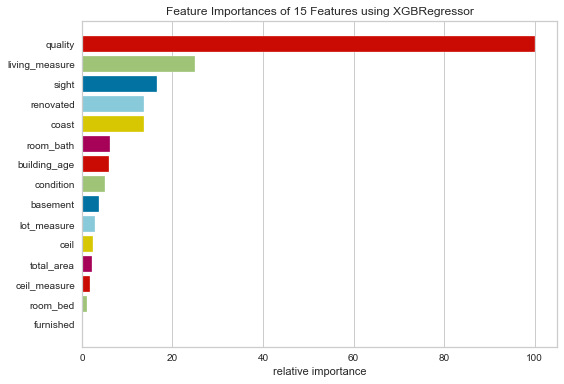

<AxesSubplot:title={'center':'Feature Importances of 15 Features using XGBRegressor'}, xlabel='relative importance'>

In [208]:
xgb_model = XGBRegressor(max_depth=4,learning_rate=0.1,n_estimators=400, reg_lambda=1.0,random_state =1)
viz = FeatureImportances(xgb_model)
viz.fit(X, y)
viz.show()

#### ADA Boost

In [226]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor


In [227]:
#Created an ada-boosting model
AD_model=AdaBoostRegressor()
AD_model.fit(X_train,y_train)

AdaBoostRegressor()

In [228]:
## Predict Train results
y_train_pred = AD_model.predict(X_train)

## Predict Test results
y_pred = AD_model.predict(X_test)

In [230]:
#entering metrics score to the metics dataframe
AD_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
AD_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
AD_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for ADA Boosting:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for ADA Boosting:
*******************************
Root mean squared error:  0.3395808413139472
R-squared:  0.5896631698456745
Mean Absolute Percentage Error:  0.021097896454749805


In [231]:
model_results = pd.DataFrame([['ADA Train', AD_RMSE_Train, AD_R2_Train, AD_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.243133      0.789651  0.014699
1  Decision Tree Train  0.290188      0.700351  0.017639
2            KNN Train  0.292309      0.695954  0.017549
3          Lasso Train  0.315246      0.646366  0.019255
4          Ridge Train  0.315243      0.646373  0.019253
5       XG Boost Train  0.221293      0.825744  0.013163
6     Ensembling Train  0.240749      0.793756  0.014587
7            ADA Train  0.339581      0.589663  0.021098


In [232]:
#entering metrics score to the metics dataframe
AD_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
AD_R2_Test = metrics.r2_score(y_test, y_pred) 
AD_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for ADA Boosting:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for ADA Boosting:
*******************************
Root mean squared error:  0.3355538510201378
R-squared:  0.5755906861549167
Mean Absolute Percentage Error:  0.020925754026023955


In [233]:
model_results = pd.DataFrame([['ADA Test', AD_RMSE_Test, AD_R2_Test, AD_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.288008      0.687342  0.017488
1  Decision Tree Test  0.312459      0.632002  0.018898
2  Decision Tree Test  0.312459      0.632002  0.018898
3            KNN Test  0.307421      0.643772  0.018637
4          Lasso Test  0.307803      0.642886  0.018806
5          Ridge Test  0.307809      0.642873  0.018805
6       XG Boost Test  0.284627      0.694640  0.017177
7     Ensembling Test  0.285401      0.692977  0.017309
8            ADA Test  0.335554      0.575591  0.020926


#### Ensemble Method

In [209]:
## Ensembling Code
# Ensembling rf_model, xgb_model,dt_model - avoided KNN as that involves scaling 

from sklearn.ensemble import VotingRegressor
estim = [('RF',rf_model),('XG',xgb_model),('DT',dt_model)]
vot = VotingRegressor(estim,weights=[1,3,1])
vot.fit(X_train,y_train)
y_train_pred = vot.predict(X_train)
y_test_pred = vot.predict(X_test)

# After these predictions are done compute RMSE, Rsquared and MAPE as earlier

In [210]:
Ensembling_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Ensembling_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Ensembling_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Ensembling:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Ensembling:
*******************************
Root mean squared error:  0.24074859716804217
R-squared:  0.7937558353802656
Mean Absolute Percentage Error:  0.014586840593040223


In [211]:
model_results = pd.DataFrame([['Ensembling Train', Ensembling_RMSE_Train, Ensembling_R2_Train, Ensembling_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.243133      0.789651  0.014699
1  Decision Tree Train  0.290188      0.700351  0.017639
2            KNN Train  0.292309      0.695954  0.017549
3          Lasso Train  0.315246      0.646366  0.019255
4          Ridge Train  0.315243      0.646373  0.019253
5       XG Boost Train  0.221293      0.825744  0.013163
6     Ensembling Train  0.240749      0.793756  0.014587


In [212]:
#entering metrics score to the metics dataframe
Ensembling_RMSE_Test = metrics.mean_squared_error(y_test, y_test_pred,squared=False)
Ensembling_R2_Test = metrics.r2_score(y_test, y_test_pred) 
Ensembling_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_test_pred) 


print("Test Results for :Ensembling")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_test_pred))


model_results = pd.DataFrame([['Ensembling Test', Ensembling_RMSE_Test, Ensembling_R2_Test, Ensembling_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

Test Results for :Ensembling
*******************************
Root mean squared error:  0.2854009055152383
R-squared:  0.6929768347698089
Mean Absolute Percentage Error:  0.017309432187399734


In [213]:
results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.288008      0.687342  0.017488
1  Decision Tree Test  0.312459      0.632002  0.018898
2  Decision Tree Test  0.312459      0.632002  0.018898
3            KNN Test  0.307421      0.643772  0.018637
4          Lasso Test  0.307803      0.642886  0.018806
5          Ridge Test  0.307809      0.642873  0.018805
6       XG Boost Test  0.284627      0.694640  0.017177
7     Ensembling Test  0.285401      0.692977  0.017309


## Comparing RSME

In [214]:
index=['Train_RMSE','Test_RMSE']
columns=['RF','DT','XGB','KNN', 'Lasso', 'Ridge','Ensembling']
train = [RF_RMSE_Train,DT_RMSE_Train,XGB_RMSE_Train,KNN_RMSE_Train,Lasso_RMSE_Train,Ridge_RMSE_Train,Ensembling_RMSE_Train]
test = [RF_RMSE_Test,DT_RMSE_Test,XGB_RMSE_Test,KNN_RMSE_Test,Lasso_RMSE_Test,Ridge_RMSE_Test,Ensembling_RMSE_Test]
#
data = pd.DataFrame([train,test],index=index,columns=columns)
round(data,3)

,RF,DT,XGB,KNN,Lasso,Ridge,Ensembling
Train_RMSE,0.243,0.290,0.221,0.292,0.315,0.315,0.241
Test_RMSE,0.288,0.312,0.285,0.307,0.308,0.308,0.285


## Comparing Adjusted R_2

In [216]:
index=['Train_Adjusted_R_Square','Test_Adjusted_R_Square']
columns=['RF','DT','XGB','KNN', 'Lasso', 'Ridge','Emsebling']
train = [RF_R2_Train,DT_R2_Train,XGB_R2_Train,KNN_R2_Train,Lasso_R2_Train,Ridge_R2_Train,Ensembling_R2_Train]
test = [RF_R2_Test,DT_R2_Test,XGB_R2_Test,KNN_R2_Test,Lasso_R2_Test,Ridge_R2_Test,Ensembling_R2_Test]

data = pd.DataFrame([train,test],index=index,columns=columns)
round(data,3)

,RF,DT,XGB,KNN,Lasso,Ridge,Emsebling
Train_Adjusted_R_Square,0.790,0.700,0.826,0.696,0.646,0.646,0.794
Test_Adjusted_R_Square,0.687,0.632,0.695,0.644,0.643,0.643,0.693


## Comparing MAPE

In [217]:
index=['Train_MAPE','Test_MAPE']
columns=['RF','DT','XGB','KNN', 'Lasso', 'Ridge','Ensembling_MAPE_Train']
train = [RF_MAPE_Train,DT_MAPE_Train,XGB_MAPE_Train,KNN_MAPE_Train,Lasso_MAPE_Train,Ridge_MAPE_Train,Ensembling_MAPE_Train]
test = [RF_MAPE_Test,DT_MAPE_Test,XGB_MAPE_Test,KNN_MAPE_Test,Lasso_MAPE_Test,Ridge_MAPE_Test,Ensembling_MAPE_Test]

data = pd.DataFrame([train,test],index=index,columns=columns)
round(data,3)

,RF,DT,XGB,KNN,Lasso,Ridge,Ensembling_MAPE_Train
Train_MAPE,0.015,0.018,0.013,0.018,0.019,0.019,0.015
Test_MAPE,0.017,0.019,0.017,0.019,0.019,0.019,0.017


In [218]:
index=['RMSE', 'Adjusted_R_Square', 'MAPE']
data = pd.DataFrame({'Random Forest Train':[RF_RMSE_Train,RF_R2_Train,RF_MAPE_Train],
        'Random Forest Test':[RF_RMSE_Test,RF_R2_Test,RF_MAPE_Test],
       'Decision Tree Train':[DT_RMSE_Train,DT_R2_Train,DT_MAPE_Train],
        'Decision Tree Test':[DT_RMSE_Test,DT_R2_Test,DT_MAPE_Test],            
       'XG Boost Train':[XGB_RMSE_Train,XGB_R2_Train,XGB_MAPE_Train],
        'XG Boost Test':[XGB_RMSE_Test,XGB_R2_Test,XGB_MAPE_Test],
       'KNN Train':[KNN_RMSE_Train,KNN_R2_Train,KNN_MAPE_Train],
        'KNN Test':[KNN_RMSE_Test,KNN_R2_Test,KNN_MAPE_Test],
        'Lasso Regression Train':[Lasso_RMSE_Train,Lasso_R2_Train,Lasso_MAPE_Train],
        'Lasso Regression Test':[Lasso_RMSE_Test,Lasso_R2_Test,Lasso_MAPE_Test],
       'Ridge Train':[Ridge_RMSE_Train,Ridge_R2_Train,Ridge_MAPE_Train],
        'Ridge Test':[Ridge_RMSE_Test,Ridge_R2_Test,Ridge_MAPE_Test],
        'Emsembling Train':[Ensembling_RMSE_Train,Ensembling_R2_Train,Ensembling_MAPE_Train],
        'Emsembling Test':[Ensembling_RMSE_Test,Ensembling_R2_Test,Ensembling_MAPE_Test]},index=index)
round(data,2)

,Random Forest Train,Random Forest Test,Decision Tree Train,Decision Tree Test,XG Boost Train,XG Boost Test,KNN Train,KNN Test,Lasso Regression Train,Lasso Regression Test,Ridge Train,Ridge Test,Emsembling Train,Emsembling Test
RMSE,0.24,0.29,0.29,0.31,0.22,0.28,0.29,0.31,0.32,0.31,0.32,0.31,0.24,0.29
Adjusted_R_Square,0.79,0.69,0.70,0.63,0.83,0.69,0.70,0.64,0.65,0.64,0.65,0.64,0.79,0.69
MAPE,0.01,0.02,0.02,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.02


In [219]:
index=['RMSE', 'Adjusted_R_Square', 'MAPE']
data = pd.DataFrame({'Random Forest Test':[RF_RMSE_Test,RF_R2_Test,RF_MAPE_Test],
        'Decision Tree Test':[DT_RMSE_Test,DT_R2_Test,DT_MAPE_Test],         
              'XG Boost Test':[XGB_RMSE_Test,XGB_R2_Test,XGB_MAPE_Test],
               'KNN Test':[KNN_RMSE_Test,KNN_R2_Test,KNN_MAPE_Test], 
        'Lasso Regression Test':[Lasso_RMSE_Test,Lasso_R2_Test,Lasso_MAPE_Test],
        'Ridge Test':[Ridge_RMSE_Test,Ridge_R2_Test,Ridge_MAPE_Test],
        'Emsembling Test':[Ensembling_RMSE_Test,Ensembling_R2_Test,Ensembling_MAPE_Test]},index=index)
round(data,2)

,Random Forest Test,Decision Tree Test,XG Boost Test,KNN Test,Lasso Regression Test,Ridge Test,Emsembling Test
RMSE,0.29,0.31,0.28,0.31,0.31,0.31,0.29
Adjusted_R_Square,0.69,0.63,0.69,0.64,0.64,0.64,0.69
MAPE,0.02,0.02,0.02,0.02,0.02,0.02,0.02


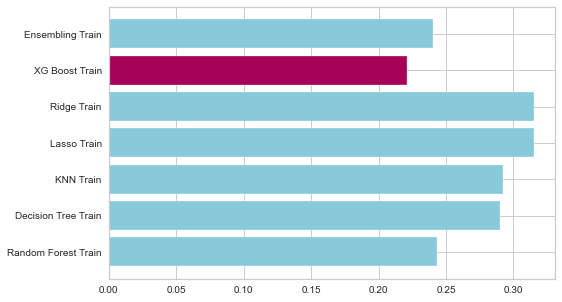

In [220]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_RMSE_index= results_train.RMSE.argmin()
plt.barh(results_train.Model, results_train.RMSE, color='c')
plt.barh(results_train.Model[min_RMSE_index], results_train.RMSE[min_RMSE_index], color='m')
plt.show()

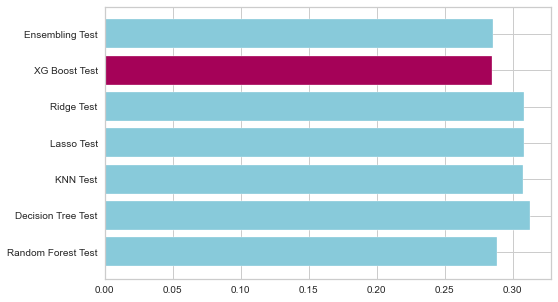

In [221]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_RMSE_index= results_test.RMSE.argmin()
plt.barh(results_test.Model, results_test.RMSE, color='c')
plt.barh(results_test.Model[min_RMSE_index], results_test.RMSE[min_RMSE_index], color='m')
plt.show()

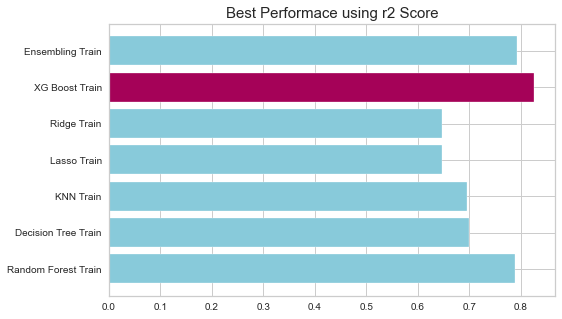

In [225]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
max_Adjusted_r_2_index= results_train.Adjusted_r_2.argmax()
plt.barh(results_train.Model, results_train.Adjusted_r_2, color='c')
plt.barh(results_train.Model[max_Adjusted_r_2_index], results_train.Adjusted_r_2[max_Adjusted_r_2_index], color='m')
plt.title("Best Performace using r2 Score", size=15);
plt.show()

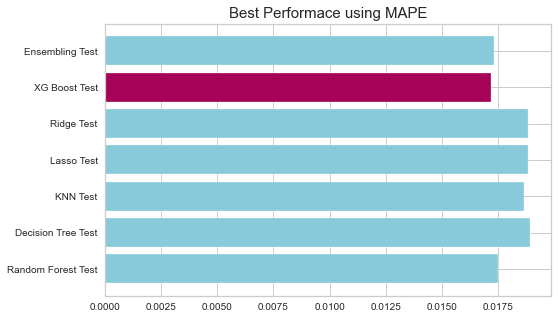

In [224]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_MAPE_index= results_test.MAPE.argmin()
plt.barh(results_test.Model, results_test.MAPE, color='c')
plt.barh(results_test.Model[min_MAPE_index], results_test.MAPE[min_MAPE_index], color='m')
plt.title("Best Performace using MAPE", size=15);
plt.show()

In [241]:
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric


In [238]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [245]:
# 1. Explained Variance Score

print('EXPLAINED VARIANCE SCORE:')
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.6429980790763495
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.64302257545948
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.6248226719511754
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.6430351836170625
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.6353897892690974
-------------------------------------------------------------------------------


In [247]:
# 2. R-squared

print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.6428495644223304
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.6428748328089663
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.624632832317908
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.6428871676973591
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.6352135974836624
-------------------------------------------------------------------------------
